# DATA MINING project
## Bank Customer Segmentation and Insurance Claim Prediction.

## Packages Used:

In [1]:
# General
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
# Clustering
from sklearn.preprocessing import StandardScaler
# HAC
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Kmeans
from sklearn.cluster import KMeans 
# Evaulation Metrics
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
# CART - RF - ANN
# Models
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
# Splitting and Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
# Evaulation Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
# For Bold printing
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# PROBLEM 1
A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

## Data Ingestion:

In [5]:
bank = pd.read_csv('bank_marketing.csv') 

In [6]:
printmd('**Viewing the top 5 rows of dataset :**')
bank.head()

**Viewing the top 5 rows of dataset :**

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [7]:
printmd('**Viewing the bottom 5 rows of dataset :**')
bank.tail()

**Viewing the bottom 5 rows of dataset :**

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


## Inference:
- All values are properly loaded.

In [8]:
printmd('**Shape of the Dataset:**')
bank.shape

**Shape of the Dataset:**

(210, 7)

In [9]:
printmd('**Number of Null values for each variable:**')
bank.isna().sum()

**Number of Null values for each variable:**

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [10]:
printmd('**Information of the Dataset:**')
bank.info()

**Information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [11]:
printmd('**Total Number of Duplicate instances present in the dataset:**')
bank.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

0

## Inference:
- There are 7 columns and 210 rows in the dataset.
- There are no null values observed in any of the columns of the dataset.
- All the columns are of the data type **float**.
- Moreover there are no duplicate instances present in the data.

In [12]:
printmd('**Describing the Variables:**')
bank.describe().T

**Describing the Variables:**

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## Inference:
- For all the variables the mean and median values are nearly same, thus the dataset is not expected to be skewed. Further analysis can be done by observing the histograms of each of the variables.
- It is observed that all the variables are not in the same range, some variables like 'spending' and 'advance_payments' have values much higher than variable like 'probability_of_full_payment'.

## Understanding the Dataset:
- The 7 variables present in the dataset correspond to credit card usage behaviour of 210 different customers. The description of the variables are as follows:
    - 'spending': It is the amount spent by the customer per month (in 1000s).
    - 'advance_payments' : Amount paid by the customer in advance by cash (in 100s).
    - 'probability_of_full_payment' : Probability of payment done in full by the customer to the bank.
    - 'current_balance' : Balance amount left in the account to make purchases (in 1000s).
    - 'credit_limit' : Limit of the amount in credit card (10000s).
    - 'min_payment_amt' : Minimum paid by the customer while making payments for purchases made monthly (in 100s).
    - 'max_spent_in_single_shopping	' : Maximum amount spent in one purchase (in 1000s).
- **On the basis of these variables which describe the credit card usage of the customers for the last few months, the customers need to be segmented into clusters such that the bank could develop promotional offers targeted towards these segments.**

## EDA:

## Univariate Analysis

**Histogram Plots of the Variables:**

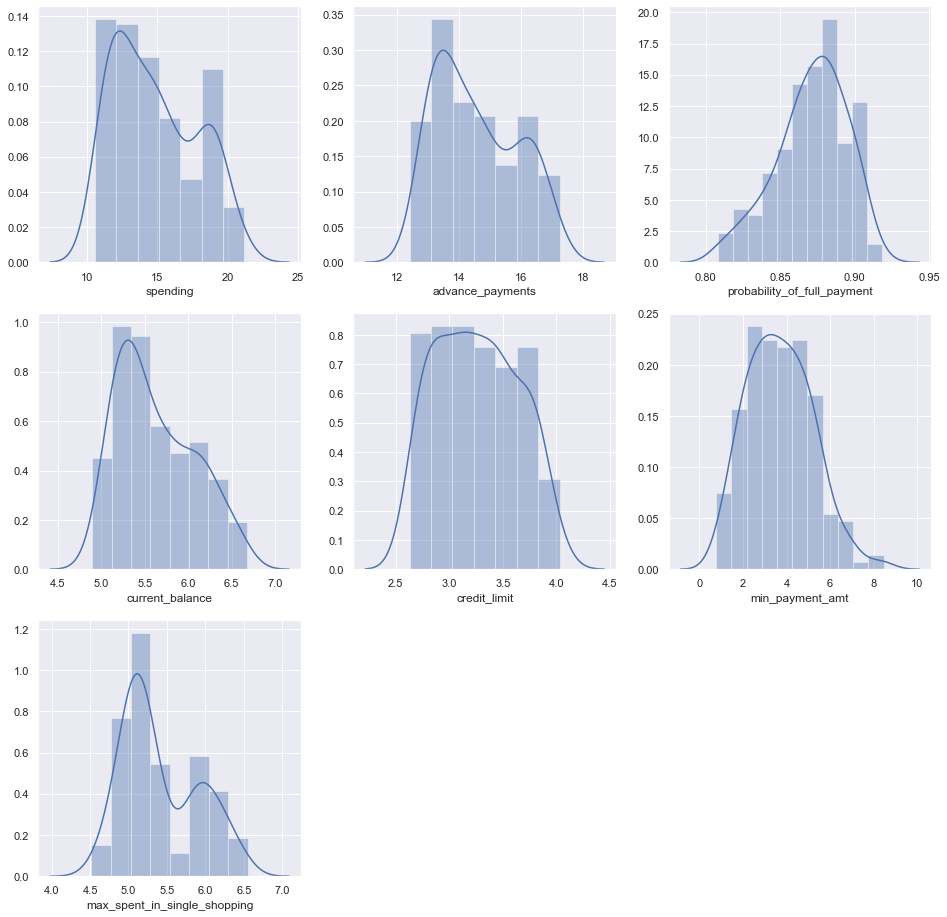

In [13]:
column_names = np.array(bank.columns.tolist())
plt.figure(figsize=(16,16))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    sns.distplot(bank[column_names[i]])
printmd('**Histogram Plots of the Variables:**')

## Inference:
From the above Histograms, the following observations are made:
- Variables **'spending', 'advance_payments' and 'max_spent_in_single_shopping'** seem to be **bimodal.**
- Variable **'min_payment_amt'** looks nearly **normally distributed with a few extremes on the right side.**
- Variable **'current_balance'** looks a little **right skewed.**
- Variable **'probability_of_full_payment'** looks a little **left skewed.**
- Variable **'credit_limit'** looks nearly **uniformly distributed.**

In [14]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
bank.skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

## Inference :
- All the variables have the skewness value within the range -1 to 1 which suggets that there is not very high skewness in the data.
- The maximum positive skewness among the variables is observed for 'max_spent_in_single_shopping'.
- The maximum negative skewness among the variables is observed for 'probability_of_full_payment'. This is also the only variable with negative skewness.
- The minimum skewness is observed for the variable 'credit_limit'. 

**Cumulative Distribution of the Variables:**

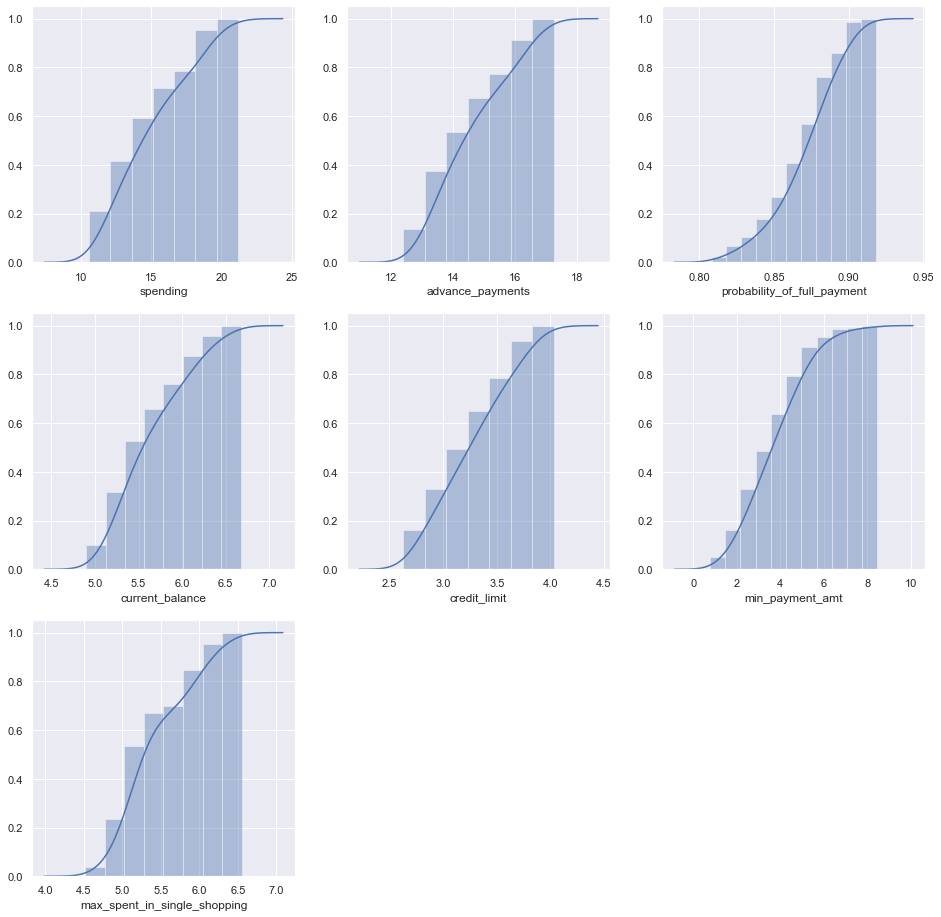

In [15]:
column_names = np.array(bank.columns.tolist())
plt.figure(figsize=(16,16))
for i in range(0,7):
    plt.subplot(3,3,i+1)
    sns.distplot(bank[column_names[i]], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
printmd('**Cumulative Distribution of the Variables:**')

## Inference : 
- All the variables have moderate slopes, which suggests that there is not very high skewness in any of the variables.

**Boxplot to observe Outliers :**

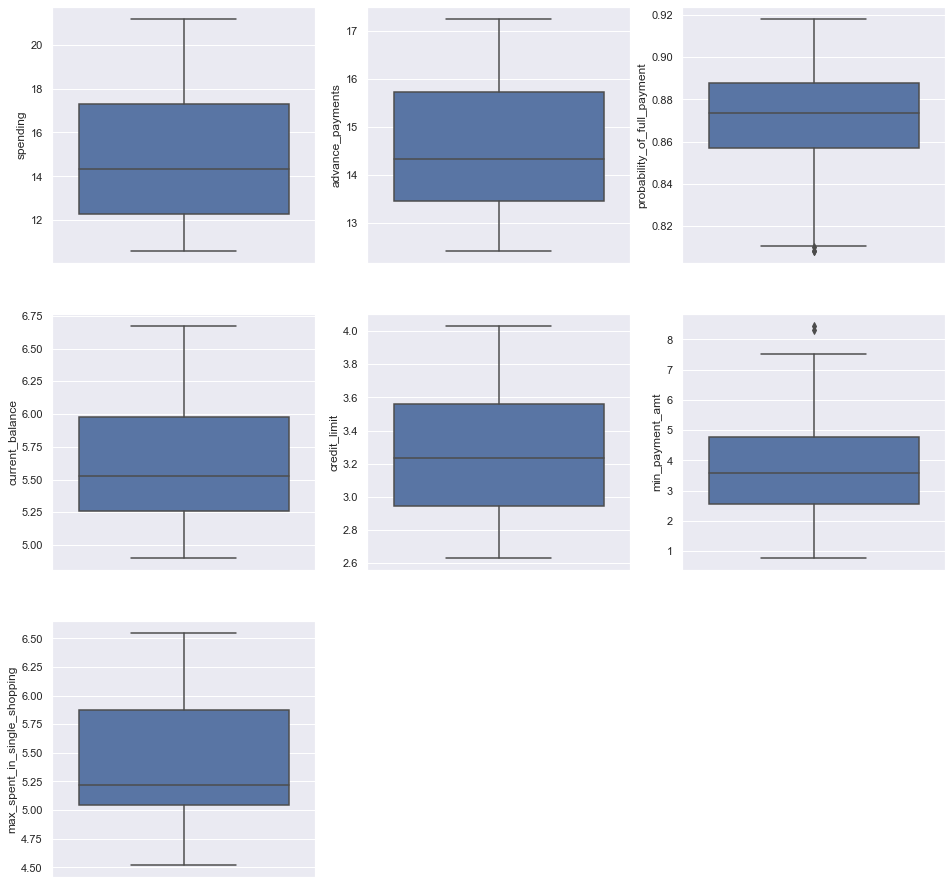

In [16]:
count = 1
plt.figure(figsize=(16,16))
for i in bank.columns :
    plt.subplot(3,3,count)
    sns.boxplot(y= i, data = bank)
    count = count + 1
printmd('**Boxplot to observe Outliers :**')

## Inference :
- **'spending', 'advance_payments', 'current_balance', 'credit_limit', 'max_spent_in_single_shopping'** variables have **no outliers** as measured by the **IQR method.**
- **'probability_of_full_payment'** have outliers present on the lower side of the whisker as measured by the **IQR method.**
- **'min_payment_amt'** have outliers present on the upper side of the whisker as measured by the **IQR method.**

## Multivariate Analysis

**Pairwise scatter plot between the variables :**

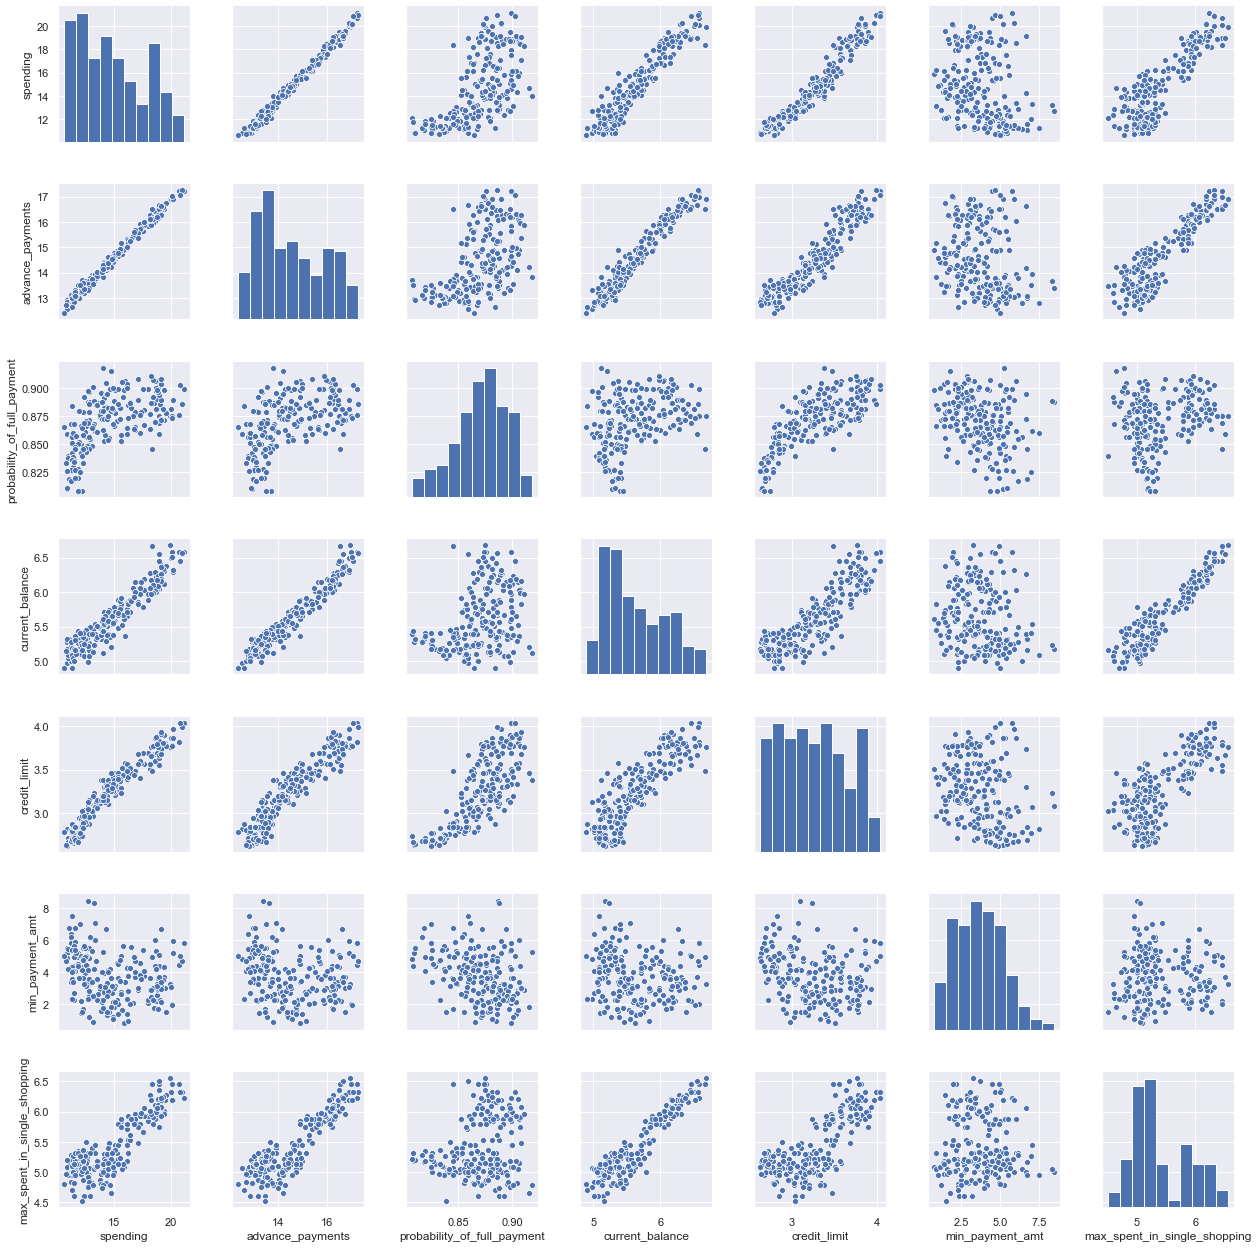

In [17]:
sns.pairplot(bank)
printmd('**Pairwise scatter plot between the variables :**')

## Inference:
- The scatter plots between the variables show that quite a few variables are positively correlated with each other. Further a quantified value of the correlation between the variables may be observed by calculating the pearson correlation coefficient. 

**Heatmap showing the correlation values between the variables :**

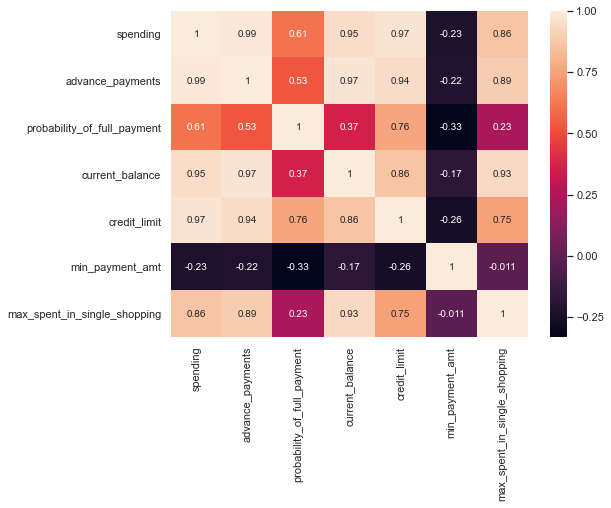

In [18]:
plt.figure(figsize = (8,6))
sns.heatmap(bank.corr(), annot =True)
printmd('**Heatmap showing the correlation values between the variables :**')

In [19]:
printmd('**Correlation Matrix of the variables showing correlation with each other :**')
bank.corr()

**Correlation Matrix of the variables showing correlation with each other :**

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


## Inferences : 
The following  observations are made from the pairwise scatter plot and pearson correlation coefficient matrix:

- **'spending'** variable has very high positive correlation with 'advance_payments', 'current_balance', 'credit_limit' variables and vice versa. It has high positive correlation with 'max_spent_in_single_shopping' variable and vice versa. 

- **'advance_payments'** variable has very high positive correlation with 'current_balance', 'credit_limit' variables and vice versa. It has high positive correlation with 'max_spent_in_single_shopping' variable and vice versa. 

- **'probability_of_full_payment'** variable has moderate positive correlation with 'credit_limit' variable and vice versa.

- **'current_balance'** variable has very high positive correlation with 'max_spent_in_single_shopping' variable and vice versa. It has high positive correlation with 'credit_limit' variable and vice versa.

- **'credit_limit'** variable has moderate positive correlation with 'max_spent_in_single_shopping' variable and vice versa.

- **'min_payment_amt'** has low negative correlation with all the other variables and vice versa.

## Note : 
**High multicollinearity is observed in the dataset. Since clustering is a distance based calculation algorithm if variables with high correlation are present they will affect the clustering process and form clusters with more weightage to variables that are highly correlated. Multicollinearity problem may be solved by using methods like feature/variable elemination, PCA etc.  Even if the issue is not addressed, it is important to take cognizance of the situation and keep it in mind while analysing the cluster profiles.**

## Observing if Scaling is necessary for the dataset:

In [20]:
printmd('**Describing the Variables:**')
bank.describe().T

**Describing the Variables:**

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


## Inferences: 
Clustering is a method of grouping different instances of an unlabeled dataset into clusters where the instances belonging to the same cluster are similar and the instances from different clusters are dissimilar to each other. It as a technique  aims at minimization of intra-cluster distances and maximization of inter-cluster distances. This is done to maintain homogenity within groups and heterogeneity between groups. **In clustering, the similarity is measured in terms of distance and hence it depends on the magnitude of the variables of the dataset.** 
 
 Different variables in a dataset are measured in different units and may have different range of magnitudes. Now if certain variables in the dataset have much higher magnitude range compared to other variables, the algorithm will be biased towards these variables, i.e. the algorithm will give more importance to these variables while forming the clusters. Similarly if   certain variables in the dataset have much lower magnitude range compared to other variables, the algorithm will give lesser importance to these variables while forming the clusters. **That's why in order to form clusters in an unbiased manner we need to scale the variables. Although it is important to note that scaling is necessary in clustering only when the variables in the dataset have comparitively high difference in magnitudes.**
  
 **In our case we can observe from the above description of the variables that certain variables are very high in magnitude as compared to other variables. For example the variables 'spending' and 'advance_payments' have mean of around 14.85 and 14.56 respectively whereas the variable 'probability_of_full_payment' has its values approximately in the range 0.808 to 0.918. This shows that scaling is required in our case.** We will use z scaling to scale the variables.


## Data Preprocessing for Clustering:

## Outlier Check:

In [21]:
Lower_outlier = []
Upper_outlier = []
column_names = np.array(bank.columns.tolist())
for i in range(0,7):
    Q1 = bank[column_names[i]].quantile(0.25)
    Q3 = bank[column_names[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(bank[bank[column_names[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(bank[bank[column_names[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = column_names)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
printmd('**The outlier counts in each variable :**')
outliers

**The outlier counts in each variable :**

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
spending,0,0,0
advance_payments,0,0,0
probability_of_full_payment,3,0,3
current_balance,0,0,0
credit_limit,0,0,0
min_payment_amt,0,2,2
max_spent_in_single_shopping,0,0,0


## Inference:
- There are 3 outliers present in 'probability_of_full_payment' variable and 2 outliers present in 'min_payment_amt' as measured by IQR method. 
- The outliers affect the clustering algorithms. So the outliers are replaced by the appropriate whisker values of the corresponding variables.

In [22]:
# Setting the Quantiles
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1

bank_no_outlier = bank.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(bank_no_outlier < Q1 - 1.5 * IQR)[0], np.where(bank_no_outlier < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    bank_no_outlier.iloc[i,j] = whisker[j]
    
    
# Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(bank_no_outlier > Q3 + 1.5 * IQR)[0], np.where(bank_no_outlier > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    bank_no_outlier.iloc[i,j] = whisker[j]

In [23]:
Lower_outlier = []
Upper_outlier = []
column_names = np.array(bank_no_outlier.columns.tolist())
for i in range(0,7):
    Q1 = bank_no_outlier[column_names[i]].quantile(0.25)
    Q3 = bank_no_outlier[column_names[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(bank_no_outlier[bank_no_outlier[column_names[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(bank_no_outlier[bank_no_outlier[column_names[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = column_names)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
printmd('**The outlier counts in each variable after removal of outliers :**')
outliers

**The outlier counts in each variable after removal of outliers :**

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
spending,0,0,0
advance_payments,0,0,0
probability_of_full_payment,0,0,0
current_balance,0,0,0
credit_limit,0,0,0
min_payment_amt,0,0,0
max_spent_in_single_shopping,0,0,0


## Inference:
- **The outliers are capped by the appropriate whisker values of the corresponding variables. There are no more outliers as measured by IQR method.**

## Standard Scaling:

In [24]:
sc = StandardScaler()

In [25]:
bank_scaled = sc.fit_transform(bank_no_outlier)

In [26]:
printmd('**Scaled data after scaling with StandardScaler :**')
bank_scaled

**Scaled data after scaling with StandardScaler :**

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

## Inference:
- The data is scaled by z scaling.

## Selection of Optimum Number of Clusters:
- We will use to methods to decide the number of optimum clusters:
    1. Hierarchical Clustering
    2. Kmeans Clustering

## 1. Hierarchical Clustering:

## Note: 
**Ward's linkage is used as the linkage method and since it supports only Euclidean distance metric, we choose Euclidean distance metric for our analysis in Hierarchical Clustering.** 

In [27]:
wardlink = linkage(bank_scaled, method = 'ward', metric = 'euclidean')

**Dendrogram with last 30 merges is shown :**

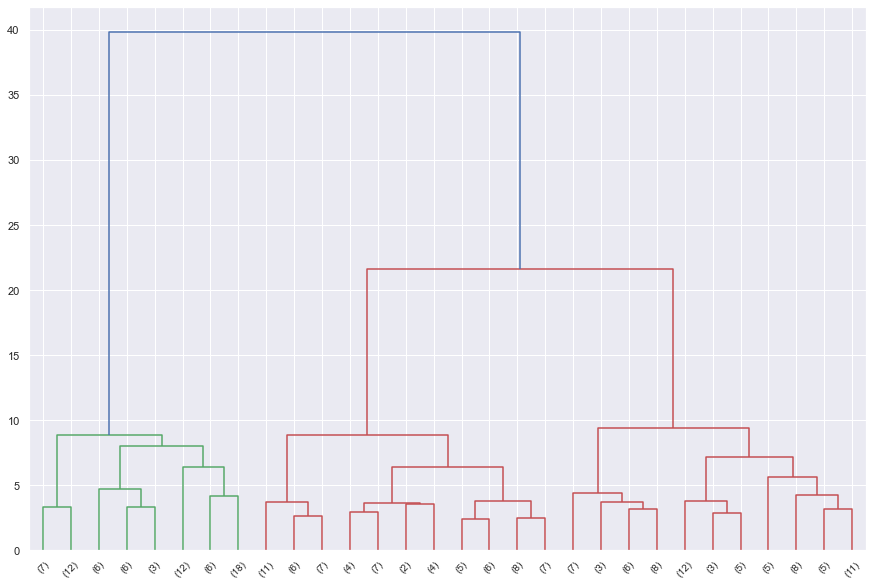

In [28]:
plt.figure(figsize = (15,10))
dend = dendrogram(wardlink, truncate_mode='lastp', p = 30)
printmd('**Dendrogram with last 30 merges is shown :**')

**Vertical distance traversed in Dendrogram for forming a new cluster from the previous cluster :**

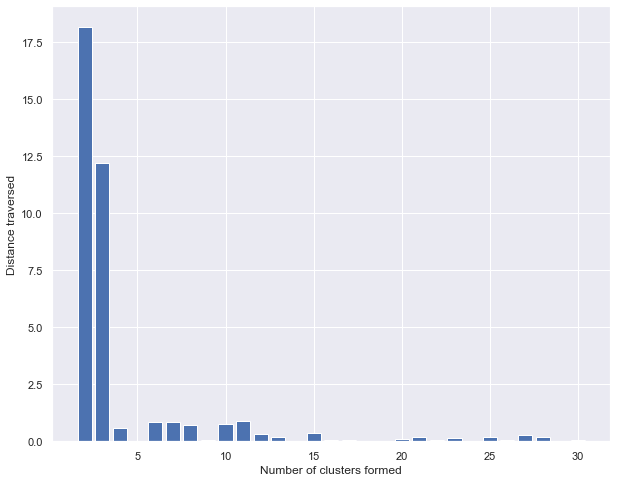

In [29]:
# Taking the last 10 cluster distances
temp1 = list(wardlink[:,2][-30:])
temp1.sort(reverse = True)
temp2 = []
for i in range(0,29):
    horz_dist = (temp1[i] - temp1[i+1])
    temp2.append(horz_dist)
plt.figure(figsize = (10,8))
plt.bar(x = range(2,len(temp2)+2), height = temp2)
plt.xlabel('Number of clusters formed')
plt.ylabel('Distance traversed')
printmd('**Vertical distance traversed in Dendrogram for forming a new cluster from the previous cluster :**')

## Inference:
- The highest distance is observed when traversing from 3 clusters to form  2 clusters, thus the 2 clusters shown in Dendrogram by Green colour and red color seem to be quite dissimilar. And hence dividing the dataset into 2 clusters will be the optimal choice. Although it must also be noted that traversing from 4 clusters to form 3 clusters the distance is quite high as well. So 3 clusters could also be an option.

## Cross verifying with Silhouette scores:
- **Silhouette Score evaluates the overall mapping of the instances to their respective clusters. It is calculated by finding the average of the Silhouette widths of the instances.** Silhouette width is given by :
    - (b-a)/max(b,a)
        - b : Distance between an instance and the nearest centroid of a cluster to which it does not belong.
        - a : Distance between an instance and the centroid of the cluster to which it does not belong.
     - Thus the range of Silhouette width lies between -1 to 1. With 1 representing a perfectly correct mapping and -1 perfectly wrong mapping. Negative value of Silhouette width means it is wrongly mapped and Positive value means it is correctly mapped.
- The closer the Silhouette score is to 1, the better.
- We will take number of cluster values ranging from 2 to 10 and find their corresponding Silhouette scores.

In [30]:
# Taking the cut off for clusters 2 to 10
temp = wardlink[:,2][-10:]
cut_off = []
for i in range(0,9):
    avg = (temp[i] + temp[i+1])/2
    cut_off.append(avg)
cut_off.sort(reverse = True)
printmd('**Cut-off used to form flat clusters of different sizes starting from 2 to 10 :**')
cut_off

**Cut-off used to form flat clusters of different sizes starting from 2 to 10 :**

[30.70556931906841,
 15.516828323564024,
 9.13226024665429,
 8.842914204951144,
 8.414256860058757,
 7.5723857253817854,
 6.791753165494653,
 6.406968273928273,
 5.998127768679076]

**Silhouette Scores :**

Silhouette Score for 2 number of clusters is: 0.46116
Silhouette Score for 3 number of clusters is: 0.39286
Silhouette Score for 4 number of clusters is: 0.30118
Silhouette Score for 5 number of clusters is: 0.24049
Silhouette Score for 6 number of clusters is: 0.21512
Silhouette Score for 7 number of clusters is: 0.23255
Silhouette Score for 8 number of clusters is: 0.23335
Silhouette Score for 9 number of clusters is: 0.22689
Silhouette Score for 10 number of clusters is: 0.22268


**Plotting the Silhouette scores for different number of clusters formed :**

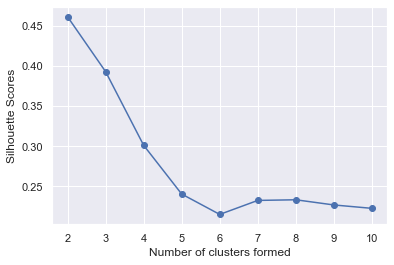

In [31]:
# Computing and plotting the Silhouette scores
count = 2
sil_scores = []
printmd('**Silhouette Scores :**')
for i in cut_off : 
    clusters = fcluster(wardlink, i, criterion='distance')
    print('Silhouette Score for ' + str(count) + ' number of clusters is: ' + str(round(silhouette_score(bank_scaled,clusters),5)) )
    sil_scores.append(silhouette_score(bank_scaled,clusters))
    count = count + 1
plt.plot(range(2,len(sil_scores)+2), sil_scores, marker = 'o')
plt.xlabel('Number of clusters formed')
plt.ylabel('Silhouette Scores')
printmd('**Plotting the Silhouette scores for different number of clusters formed :**')

## Inferences:
- The highest Silhouette Score of 0.4612 is observed when number of clusters is 2, this also confirms to our choice of optimal clusters using the Dendrogram. We can also observe that Silhouette score of 0.3928 is observed when number of clusters is 3.

## 2. Kmeans Clustering:

## Optimum clusters for K-Means :
K-Means is a centroid based clustering model, it is an iterative clustering algorithm in which the notion of similarity is derived by the closeness of an instance to the centroid of the clusters. **To perform K-Means we need to first decide the optimum number of clusters. This can be decided by observing Elbow Curve in combination with Silhouette scores for different clusters.**

## Within Cluster Sum of Squares plot (Elbow Curve) :
- The plot consists of the number of clusters on the X-axis and the corresponding within cluster sum of squares on the Y-axis.

In [32]:
wss =[] 
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', n_init=10)
    k_means.fit(bank_scaled)
    wss.append(k_means.inertia_)

**Plotting the Within Cluster Sum of Squares for different number of clusters formed (Elbow Curve):**

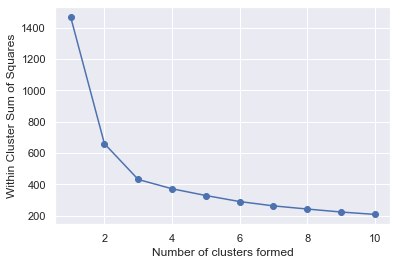

In [33]:
plt.plot(range(1,11), wss, marker = 'o')
plt.xlabel('Number of clusters formed')
plt.ylabel('Within Cluster Sum of Squares')
printmd('**Plotting the Within Cluster Sum of Squares for different number of clusters formed (Elbow Curve):**')

## Inference:
- **The within cluster sum of squares for different clusters formed is observed and wherever the plot seems to form an elbow, we choose that corresponding cluster value on X-axis as the number of clusters for the K-Means. From the elbow curve the choice of deciding the optimum clusters clearly seems to be 3, as after 3 the decrease in WCSS is very less.** 

## Silhoutte Scores:


Silhouette Score for 2 number of clusters is: 0.4656
Silhouette Score for 3 number of clusters is: 0.40081
Silhouette Score for 4 number of clusters is: 0.33737
Silhouette Score for 5 number of clusters is: 0.28619
Silhouette Score for 6 number of clusters is: 0.28689
Silhouette Score for 7 number of clusters is: 0.28246
Silhouette Score for 8 number of clusters is: 0.26121
Silhouette Score for 9 number of clusters is: 0.25832


**Plotting the Silhouette scores for different number of clusters formed :**

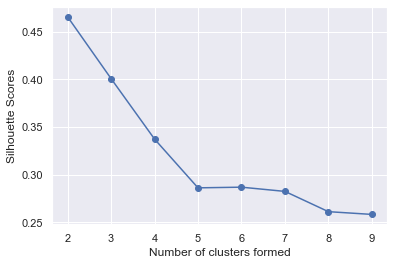

In [34]:
count = 2
sil_scores = []
for i in range (2,10):
    k_means = KMeans(n_clusters = i, n_init=10, random_state = 42)
    k_means.fit(bank_scaled)
    labels = k_means.labels_
    sil_scores.append(silhouette_score(bank_scaled,labels))
    print('Silhouette Score for ' + str(count) + ' number of clusters is: ' + str(round(silhouette_score(bank_scaled,labels),5)) )
    count = count + 1
plt.plot(range(2,10), sil_scores, marker = 'o')
plt.xlabel('Number of clusters formed')
plt.ylabel('Silhouette Scores')
printmd('**Plotting the Silhouette scores for different number of clusters formed :**')

## Inference:
- The highest Silhouette score of 0.4656 is observed when number of clusters is 2. The second highest Silhouette score of 0.4008 is observed when number of clusters is 3.
- It is observed that when we choose number of clusters as '2' it has higher silhouette score than when we choose the number of clusters as '3'. Although the Elbow curve clearly suggest optimum cluster of 3.

## Observing Negative Mapping of clusters by checking presence of Negative Silhouette width of the instances:

In [35]:
for i in [2,3]:
    k_means = KMeans(n_clusters = i, n_init=10, random_state = 42)
    k_means.fit(bank_scaled)
    labels = k_means.labels_
    temp_df  = pd.DataFrame(silhouette_samples(bank_scaled,labels), columns = ['Sil_width']) 
    print('The number of instances with negative Silhouette width for ' + str(i) + ' clusters is :', temp_df[temp_df < 0].count().iloc[0])
    printmd('**The negative Silhouette width values are :**')
    print(temp_df[temp_df['Sil_width'] < 0]['Sil_width'])
    print('')

The number of instances with negative Silhouette width for 2 clusters is : 1


**The negative Silhouette width values are :**

102   -0.005677
Name: Sil_width, dtype: float64

The number of instances with negative Silhouette width for 3 clusters is : 0


**The negative Silhouette width values are :**

Series([], Name: Sil_width, dtype: float64)



## Inferences:
- There are no wrong mapping when the number of clusters is 3 although there is one wrong mapping when the number of clusters is 2.

# Conclusion on number of Optimum Clusters:
- The Silhouette scores suggest for both the Hierarchical Clustering and K-means clustering that the when the number of clusters is chosen as 2, the Silhouette score is higher followed by when number of clusters is 3.
- The Hierarchical Clustering Dendrogram suggest that taking the number of clusters as 2 is better, although choosing number of clusters as 3 is good enough as compared to higher number of clusters.
- The WCSS or Elbow Curve although clearly suggests that choosing number of clusters as 3 will be optimum.
- Based on the above analysis we have to make decision on the optimum number of clusters. **Since Elbow curve gives a clear indication of 3 clusters and Silhoutte scores with 3 clusters is also good enough, the number of optimum clusters is considered as 3.**

# Forming Cluster Profiles:

## 1. Hierarchical Clustering Profile :

## Describing the Clusters formed:

In [36]:
# Adding the Clusters to the Original dataframe
bank_HAC = bank_no_outlier.copy()
clusters = fcluster(wardlink, 15 , criterion='distance')
bank_HAC['clusters_HAC'] = clusters
printmd('**The number of instances present in the 2 clusters :**')
bank_HAC.clusters_HAC.value_counts()

**The number of instances present in the 2 clusters :**

3    73
1    70
2    67
Name: clusters_HAC, dtype: int64

## Inferences:
- There are 70 instances in cluster '1', 67 instances in cluster '2' and 73 instances in cluster '3'.

In [37]:
printmd('**Observing the head of the dataframe with each instance marked by its cluster label :**')
bank_HAC.head()

**Observing the head of the dataframe with each instance marked by its cluster label :**

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_HAC
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [38]:
profile_HAC = bank_HAC.groupby('clusters_HAC').mean()
profile_HAC['Frequency_HAC'] = bank_HAC.clusters_HAC.value_counts().sort_index()
printmd('**Cluster profile obtained after Hierarchical Clustering :**')
profile_HAC.T

**Cluster profile obtained after Hierarchical Clustering :**

clusters_HAC,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Frequency_HAC,70.000000,67.000000,73.000000


## Inferences:
- The mean value of all the variables is higher for cluster '1' except for the variable 'min_payment_amt'. For variable 'min_payment_amt', the highest mean is observed for cluster '2'.
- Except for varaiables 'min_payment_amt' and 'max_spent_in_single_shopping' cluster '2' has the lowest mean for all other variables.

## 2. K Means Clustering Profile :

In [39]:
# K-Means Clustering
k_means = KMeans(n_clusters = 3, n_init=10, random_state = 42)
k_means.fit(bank_scaled)
labels = k_means.labels_
# Adding the labels to DataFrame
bank_Kmeans = bank_no_outlier.copy()
bank_Kmeans['clusters_Kmeans'] = labels
printmd('**The number of instances present in the 2 clusters :**')
bank_Kmeans.clusters_Kmeans.value_counts()

**The number of instances present in the 2 clusters :**

1    72
0    71
2    67
Name: clusters_Kmeans, dtype: int64

## Inference:
- There 71 instances in cluster '0', 72 instances in cluster '1'and 67 instances in cluster '2'.

In [40]:
printmd('**First five rows of the dataset after adding K-Means cluster labels :**')
bank_Kmeans.head()

**First five rows of the dataset after adding K-Means cluster labels :**

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_Kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,2


In [41]:
profile_Kmeans = bank_Kmeans.groupby('clusters_Kmeans').mean()
profile_Kmeans['Frequency_Kmeans'] = bank_Kmeans.clusters_Kmeans.value_counts().sort_index()
printmd('**Cluster profile obtained after K-Means Clustering :**')
profile_Kmeans.T

**Cluster profile obtained after K-Means Clustering :**

clusters_Kmeans,0,1,2
spending,14.437887,11.856944,18.495373
advance_payments,14.337746,13.247778,16.203433
probability_of_full_payment,0.881597,0.848330,0.884210
current_balance,5.514577,5.231750,6.175687
credit_limit,3.259225,2.849542,3.697537
min_payment_amt,2.707341,4.733892,3.632373
max_spent_in_single_shopping,5.120803,5.101722,6.041701
Frequency_Kmeans,71.000000,72.000000,67.000000


## Inferences:
- Nearly same trend is observed for the clusters formed by Kmeans, here Cluster '2' is equivalent to cluster '1' in Hierarchical clustering, Cluster '1' of Kmeans is equivalent to Cluster '2' and Cluster '0' in Kmeans is equivalent to cluster '3' in hierarchical.

## Comparing Cluster profile as formed by Hierarchical and K-Means Clustering:.
- The pattern of the cluster profiles formed is similar for the Hierarchical Clustering and K-Means clustering.
- **The cluster profiles formed by the K-Means clustering will be used for customer segmentation.**

##  Final Cluster Profiles Description :

In [42]:
profile_final = profile_Kmeans.T.copy()
profile_final

clusters_Kmeans,0,1,2
spending,14.437887,11.856944,18.495373
advance_payments,14.337746,13.247778,16.203433
probability_of_full_payment,0.881597,0.848330,0.884210
current_balance,5.514577,5.231750,6.175687
credit_limit,3.259225,2.849542,3.697537
min_payment_amt,2.707341,4.733892,3.632373
max_spent_in_single_shopping,5.120803,5.101722,6.041701
Frequency_Kmeans,71.000000,72.000000,67.000000


## Naming of Clusters:
- Since it is observed that Cluster '2' has much higher mean spendings, also the maximum amount spent is much higher in cluster '2'. Moreover the credit limit and current balance is also higher for customers in cluster '2'. The same is observed to be lowest for Cluster '1'. **Cluster '2' may be referred to as High-spenders and Clsuter '1'  to as Low-spenders, while cluster '0' as Medium-spenders** 

In [43]:
profile_final.rename(columns={0: "Medium-Spenders", 1: "Low-Spenders", 2: "High-Spenders"}, inplace =True)
profile_final

clusters_Kmeans,Medium-Spenders,Low-Spenders,High-Spenders
spending,14.437887,11.856944,18.495373
advance_payments,14.337746,13.247778,16.203433
probability_of_full_payment,0.881597,0.848330,0.884210
current_balance,5.514577,5.231750,6.175687
credit_limit,3.259225,2.849542,3.697537
min_payment_amt,2.707341,4.733892,3.632373
max_spent_in_single_shopping,5.120803,5.101722,6.041701
Frequency_Kmeans,71.000000,72.000000,67.000000


## Description of the Cluster Profiles:
- High-spenders have the highest mean spendings per month.
- High-spenders pay more amount in adavance by cash on an average, this suggests that they have more cash available to expend.
- High-spenders even though have higher expenses using the credit cards, they still have a better average probability of paying the bank back than the Low-spenders. 
- High-spenders even with more spendings still have on an average more balance amount left in account to make purchases.
- High-spenders have higher credit limit on an average, thus giving them more spending scope than low and medium spenders.
- High-spenders on an average spend more amount in a single purchacse, thus making them cardholders who use their cards for **high-ticket items.**
- Low-spenders on an average pay much higher minimum amount while making payments for purchases made monthly.

## Promotional strategies for the High-spenders and Low-spenders:
- High-spenders: They already use their credit cards for more purchases, but this could be further increased by the following strategies:
    1. As they have higher probability of paying back the bank and also they tend to spend higher monthly, **an increase in the credit limit** could further give a push to their spendings.
    2. A digital wallet facility could me made available to the High-spenders, via which they could seamlessly make purchases.
    3. As the High-spenders tend to spend more in single time purchases, they could be further encouraged by providing them higher credit points for spending more in a single purchase.
- Low-spenders: They use their credit cards for purchases of lesser amount and need to be encouraged to spend more; this could be done by employing the following strategies:
    1. The Low-spenders could be given spend-and-get offers so that their usage could be increased.
    2. Further bill pay campaigns could be laid out targeting the Low-spenders where they would be encourage to pay their various monthly bills using the credit cards by giving them offers.
    3. The Low-spenders could be given lucrative redemption points which expire in limited time period, such that their spendings is further encouraged.
- Medium-spenders: A mix plan may be made to approach the medium spenders. 
- Moreover, regular communication should be maintained without overwhelming the customers via different platforms such that they are aware of these different offers.

# PROBLEM 2:
An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.


## Data Ingestion:

In [44]:
insurance = pd.read_csv('insurance.csv') 

In [45]:
printmd('**Viewing the top 5 rows of dataset :**')
insurance.head()

**Viewing the top 5 rows of dataset :**

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [46]:
printmd('**Viewing the bottom 5 rows of dataset :**')
insurance.tail()

**Viewing the bottom 5 rows of dataset :**

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


## Inference:
- All values are properly loaded.

In [47]:
printmd('**Shape of the Dataset:**')
insurance.shape

**Shape of the Dataset:**

(3000, 10)

In [48]:
printmd('**Total Number of Null values for each variable:**')
insurance.isna().sum()

**Total Number of Null values for each variable:**

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [49]:
printmd('**Information of the Dataset:**')
insurance.info()

**Information of the Dataset:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


## Inference:
- There are 3000 rows and 10 columns in the dataset.
- **There are no null values in the dataset.**
- There are float, integer and object data types present in the dataset. The different variables with their respective data types are as follows:
    - 'Commision' and 'Sales' variables are float data type.
    - 'Age' and 'Duration' variables are integer data type.
    - Rest of the 6 variables are object data type.
- **Note :** For performing CART, RF and ANN we need to convert the object data types to numerical.

## Data Dictionary:
- The explanation of what the variables represent is as follows:
    1. 'Claimed' : It is the insurance claimed status.
    2. 'Agency_Code' : It is the code of the tour firm.
    3. 'Type' : Type of tour firms.
    4. 'Channel' : Distribution channel of tour insurance agencies.
    5. 'Product' : Name of the tour insurance products.
    6. 'Duration' : Duration of the tour.
    7. 'Destination' : Destination of the tour.
    8. 'Sales' : Amount of sales of tour insurance policies.
    9. 'Commision' : The commision received for tour insurance firm.
    10. 'Age' : Age of the insured.

## Checking for Duplicates:


In [50]:
printmd('**Total Number of Duplicate instances present in the dataset:**')
insurance.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

139

## Inference:
- There 139 duplicate instances in the dataset. These duplicates may the same person with exact same details for all the variables booking a tour or may be redundant entry due to same fault. **The chances of all the variables including 'Age', 'Sales', 'Duration', even 'Claimed' status for booking the tour for the second time or multiple times to remain exactly same is less and hence the duplicate records will be treated as redundant records here.** Thus the duplicate instances are dropped.

## Deleting the duplicate instances from the dataset:
- The duplicates are deleted first so that it does not affect the description of the dataset.

In [51]:
insurance.drop_duplicates(inplace = True)
printmd('**Total Number of Duplicate instances present in the dataset:**')
insurance.duplicated().sum()

**Total Number of Duplicate instances present in the dataset:**

0

In [52]:
printmd('**Shape of the Dataset:**')
insurance.shape

**Shape of the Dataset:**

(2861, 10)

## Inference:
- The duplicate instances are deleted. Now we have 2861 instances present in the dataset.

## DESCRIPTIVE ANALYSIS :

## 1. Numerical Variables:

In [53]:
printmd('**Describing the Numerical Variables:**')
insurance.describe().T

**Describing the Numerical Variables:**

,count,mean,std,min,25%,50%,75%,max
Age,2861.0,38.204124,10.678106,8.0,31.0,36.00,43.00,84.00
Commision,2861.0,15.080996,25.826834,0.0,0.0,5.63,17.82,210.21
Duration,2861.0,72.120238,135.977200,-1.0,12.0,28.00,66.00,4580.00
Sales,2861.0,61.757878,71.399740,0.0,20.0,33.50,69.30,539.00


In [54]:
printmd('**Instances showing no \'Commision\' for the tour insurance firm:**')
insurance[insurance['Commision'] == 0].Commision.count()

**Instances showing no 'Commision' for the tour insurance firm:**

1239

In [55]:
printmd('**Instances showing 0 or negative \'Duration\' of tour:**')
insurance[insurance['Duration'] <= 0]

**Instances showing 0 or negative 'Duration' of tour:**

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.30,Online,-1,18.00,Bronze Plan,ASIA
1746,48,C2B,Airlines,No,0.14,Online,0,0.51,Customised Plan,ASIA
2628,37,C2B,Airlines,No,49.60,Online,0,124.00,Bronze Plan,ASIA


In [56]:
printmd('**Sorting the \'Duration\' variable :**')
insurance.Duration.sort_values(ascending = False)

**Sorting the 'Duration' variable :**

2845    4580
2914     466
2260     434
1398     431
873      428
        ... 
437        1
487        1
1746       0
2628       0
1508      -1
Name: Duration, Length: 2861, dtype: int64

In [57]:
print('Instances showing no \'Sales\' of tour insurance policies:', insurance[insurance['Sales'] == 0].Sales.count())
print('Instances showing no \'Sales\' of tour insurance policies and also No claims for insurance:',
     insurance[(insurance['Sales'] == 0) & (insurance['Claimed'] == 'No')].Sales.count())

Instances showing no 'Sales' of tour insurance policies: 52
Instances showing no 'Sales' of tour insurance policies and also No claims for insurance: 52


## Inference
- **'Age'** variable has the mean and median nearly same, hence it is not expected to be skewed. Minimum age of insured is 8 and maximum age is 84.
- **'Commision'** variable has very high mean compared to the median and so it is expected to be right skewed. There are 1239 instances when the tour insurance did not receive any commisions.
- **'Duration'** variable has very high mean compared to the median and so it is expected to be right skewed. **There seems to be out of context data present in the variable. As the Duration of the tour should be at least greater than 0. There are '3' such instances which have duration less than or equal to '0'. As there are only 3 such instances i.e. nearly 0.1% of dataset, the instances may be dropped, or duration value imputed or kept as it is.** Also note that there is a maximum value of 4580 which is around 10 times higher than the second highest of 466.
- **'Sales'** variable has very high mean compared to the median and so it is expected to be right skewed. There are 52 instances where there is no sale of insurance policies and hence there should be no claim of insurance as well for these instances. **This is verified and found to be correct, hence there is no anamoly.**

### Droping the 3 instances where duration is negative or 0 :

In [58]:
insurance.drop(index = insurance[insurance['Duration'] <= 0].index,  inplace =True)
printmd('**Shape of insurance after dropping the instances with negative or 0 duration :**')
insurance.shape

**Shape of insurance after dropping the instances with negative or 0 duration :**

(2858, 10)

## 2. Categorical Variables:

In [59]:
printmd('**Describing the Categorical variables :**')
insurance.describe(include = 'object').T

**Describing the Categorical variables :**

,count,unique,top,freq
Agency_Code,2858,4,EPX,1238
Type,2858,2,Travel Agency,1709
Claimed,2858,2,No,1944
Channel,2858,2,Online,2812
Product Name,2858,5,Customised Plan,1070
Destination,2858,3,ASIA,2324


In [60]:
printmd('**Value counts of the categorical type variables :**')
temp = insurance.drop(['Age', 'Commision', 'Duration', 'Sales'], axis = 1) 
for i in list(temp):
    print(i)
    print(temp[i].value_counts())
    print()

**Value counts of the categorical type variables :**

Agency_Code
EPX    1238
C2B     911
CWT     471
JZI     238
Name: Agency_Code, dtype: int64

Type
Travel Agency    1709
Airlines         1149
Name: Type, dtype: int64

Claimed
No     1944
Yes     914
Name: Claimed, dtype: int64

Channel
Online     2812
Offline      46
Name: Channel, dtype: int64

Product Name
Customised Plan      1070
Bronze Plan           643
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

Destination
ASIA        2324
Americas     319
EUROPE       215
Name: Destination, dtype: int64



In [61]:
printmd('**The Type of the tour firm :**')
insurance.groupby('Agency_Code')['Type'].unique()

**The Type of the tour firm :**

Agency_Code
C2B         [Airlines]
CWT    [Travel Agency]
EPX    [Travel Agency]
JZI         [Airlines]
Name: Type, dtype: object

In [62]:
printmd('**The percentage of Distribution channels :**')
insurance.Channel.value_counts('Normalize')*100

**The percentage of Distribution channels :**

Online     98.390483
Offline     1.609517
Name: Channel, dtype: float64

In [63]:
printmd('**The percentage of Destination choices :**')
insurance.Destination.value_counts('Normalize')*100

**The percentage of Destination choices :**

ASIA        81.315605
Americas    11.161652
EUROPE       7.522743
Name: Destination, dtype: float64

## Inferences:
- There five independent categorical type variables with object data type. They are explained below:
    1. **'Agency_Code' :** There are four tour firms/agencies which are represented by the codes: 'EPX', 'C2B', 'CWT', 'JZI'.
    2. **'Type' :** There are two types of tour firms: 'Airlines' and 'Travel Agency'. The Agencies with code 'C2B' and 'JZI' are 'Airlines' type and the agencies with code 'CWT' and 'EPX' are 'Travel Agency' type.
    4. **'Channel' :** There are two distribution channels of the tour agencies: 'Online' and 'Offline'. Around 98.4% of the distribution in the dataset is done online.
    5. **'Product Name' :** There are five insurance products provided, they are : 'Customised Plan', 'Bronze Plan', 'Cancellation Plan', 'Silver Plan' and 'Gold Plan'. The highest and lowest number of choosen plans are 'Customised Plan' and 'Gold Plan' respectively. 
    6. **'Destination' :** There are three Destination choices 'ASIA', 'Americas' and 'EUROPE'. Most of the tours around 81%  are to 'ASIA'.

## Checking Dataset Imbalance:

**Count of Status of Insurance Claims in the dataset:**

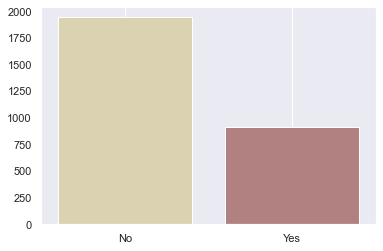

In [64]:
sns.barplot(insurance.Claimed.value_counts().index,insurance.Claimed.value_counts().values,palette='pink_r')
plt.grid()
printmd('**Count of Status of Insurance Claims in the dataset:**')
plt.show()

In [65]:
printmd('**The percentage of Insurance claims :**')
insurance.Claimed.value_counts('Normalize')*100

**The percentage of Insurance claims :**

No     68.019594
Yes    31.980406
Name: Claimed, dtype: float64

## Inferences:
- **'Claimed' :** It is the status of the insurance claimed by the insured. If insurance is claimed, it is denoted by 'Yes' otherwise by 'No'. **It is our target or dependent variable. Imbalance in class is observed as 'Yes' is only around 32% of the instances and 'No' is around 68%. Thus 'No' is our majority class and 'Yes' minority class** 

## Univariate Analysis

**Histogram Plots of the Variables:**

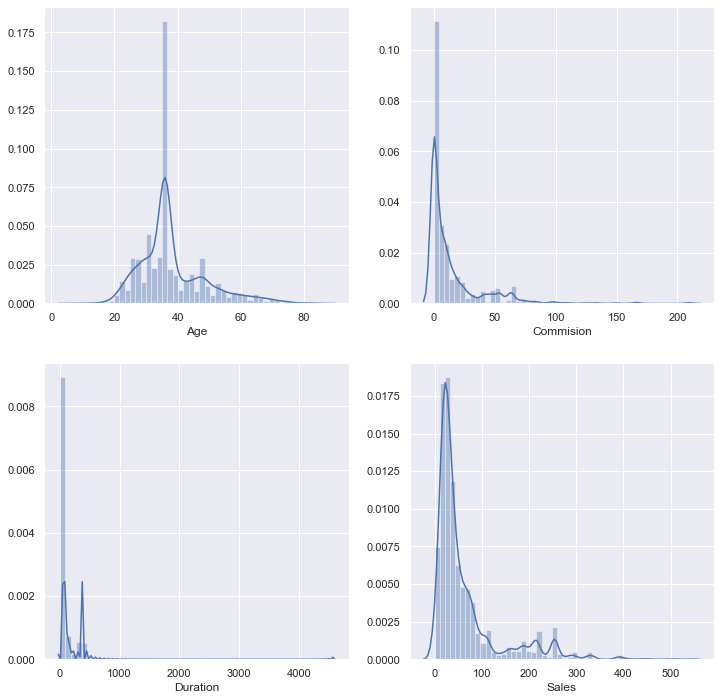

In [66]:
column_names = ['Age', 'Commision', 'Duration', 'Sales']
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.distplot(insurance[column_names[i]])
printmd('**Histogram Plots of the Variables:**')

## Inference:
- All the variables 'Age', 'Commision', 'Duration' and 'Sales' look right skewed. 

In [67]:
printmd('**Skewness of the different variables in descending order of positive skewness:**')
insurance[column_names].skew().sort_values(ascending = False)

**Skewness of the different variables in descending order of positive skewness:**

Duration     13.783518
Commision     3.106443
Sales         2.345157
Age           1.103885
dtype: float64

## Inference:
- All the variables 'Age', 'Commision', 'Duration' and 'Sales' have skewness greater than 1. 'Duration' variable has very high skewness.

**Cumulative Distribution of the Variables:**

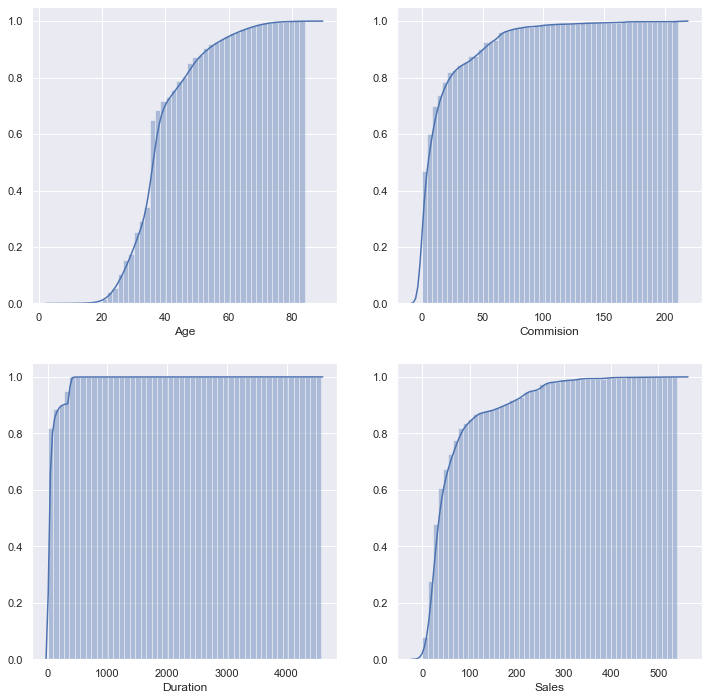

In [68]:
column_names = ['Age', 'Commision', 'Duration', 'Sales']
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(2,2,i+1)
    sns.distplot(insurance[column_names[i]], hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
printmd('**Cumulative Distribution of the Variables:**')

## Inference :
- All the variables 'Age', 'Commision', 'Duration' and 'Sales' have high positive slope, suggesting right skewness. 

**Boxplot to observe Outliers :**

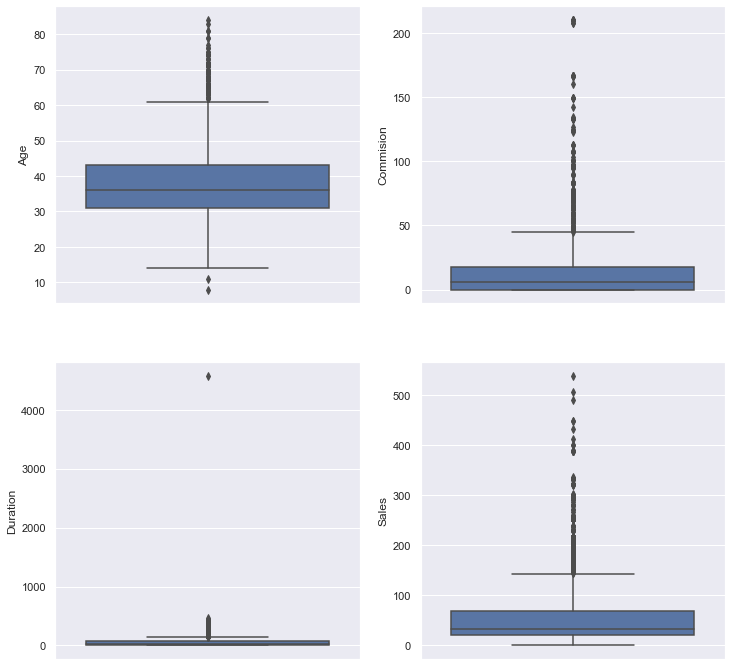

In [69]:
column_names = ['Age', 'Commision', 'Duration', 'Sales']
count = 1
plt.figure(figsize=(12,12))
for i in column_names :
    plt.subplot(2,2,count)
    sns.boxplot(y= i, data = insurance[column_names])
    count = count + 1
printmd('**Boxplot to observe Outliers :**')

In [70]:
column_names = ['Age', 'Commision', 'Duration', 'Sales']
Lower_outlier = []
Upper_outlier = []
for i in range(0,4):
    Q1 = insurance[column_names[i]].quantile(0.25)
    Q3 = insurance[column_names[i]].quantile(0.75)
    IQR = Q3 - Q1
    Lower_outlier.append(insurance[insurance[column_names[i]] < (Q1 - 1.5*IQR)].count()[0])
    Upper_outlier.append(insurance[insurance[column_names[i]] > (Q3 + 1.5*IQR)].count()[0])

outliers = pd.DataFrame(data = Lower_outlier, columns =['Lower Outliers Count'], index = column_names)
outliers['Upper Outliers Count'] = Upper_outlier
outliers['Total Outliers Count'] = outliers['Lower Outliers Count'] + outliers['Upper Outliers Count']
printmd('**The outlier counts according to IQR is :**')
outliers

**The outlier counts according to IQR is :**

,Lower Outliers Count,Upper Outliers Count,Total Outliers Count
Age,2,128,130
Commision,0,353,353
Duration,0,362,362
Sales,0,346,346


## Inference:
- According to IQR method, it is observed that all the variables 'Age', 'Commision', 'Duration' and 'Sales' have outliers.

## Bivariate Analysis with the Target Variable: 

## Numeric Variables

**Mean of Duration variable according to insurance claim status :**

Claimed
No      53.50463
Yes    111.95186
Name: Duration, dtype: float64


**Barplot of Duration variable according to insurance claim status :**

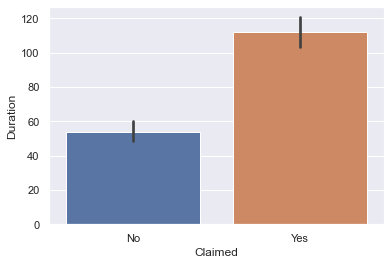

In [71]:
sns.barplot(y = insurance['Duration'], x = insurance['Claimed'] )
printmd('**Mean of Duration variable according to insurance claim status :**')
print(insurance.groupby('Claimed').mean().Duration)
printmd('**Barplot of Duration variable according to insurance claim status :**')

**Mean of Sales variable according to insurance claim status :**

Claimed
No     45.389779
Yes    96.618217
Name: Sales, dtype: float64


**Barplot of Sales variable according to insurance claim status :**

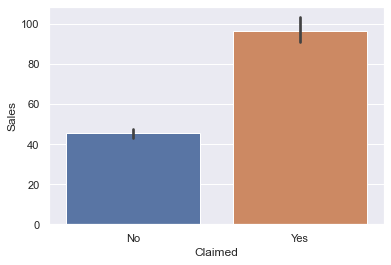

In [72]:
sns.barplot(y = insurance['Sales'], x = insurance['Claimed'] )
printmd('**Mean of Sales variable according to insurance claim status :**')
print(insurance.groupby('Claimed').mean().Sales)
printmd('**Barplot of Sales variable according to insurance claim status :**')

**Mean of Commision variable according to insurance claim status :**

Claimed
No     10.062701
Yes    25.742670
Name: Commision, dtype: float64


**Barplot of Commision variable according to insurance claim status :**

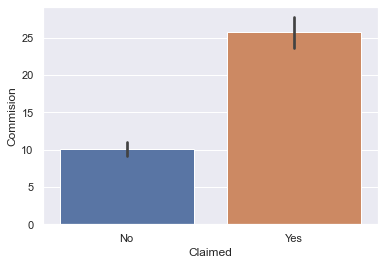

In [73]:
sns.barplot(y = insurance['Commision'], x = insurance['Claimed'] )
printmd('**Mean of Commision variable according to insurance claim status :**')
print(insurance.groupby('Claimed').mean().Commision)
printmd('**Barplot of Commision variable according to insurance claim status :**')

**Mean of Age variable according to insurance claim status :**

Claimed
No     38.463992
Yes    37.656455
Name: Age, dtype: float64


**Barplot of Age variable according to insurance claim status :**

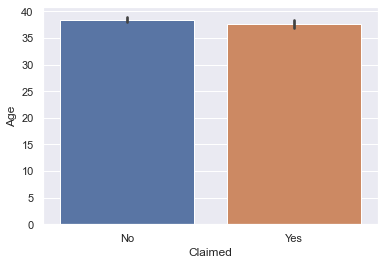

In [74]:
sns.barplot(y = insurance['Age'], x = insurance['Claimed'] )
printmd('**Mean of Age variable according to insurance claim status :**')
print(insurance.groupby('Claimed').mean().Age)
printmd('**Barplot of Age variable according to insurance claim status :**')

## Inference:
- **Duration :** The average duration of people of claimed inusrance is much higher than people who didn't claim insurance, it is approximately double.
- **Sales :** The average Sales of tour insurance policies to people who claimed inusrance is much higher than people who didn't claim insurance, it is approximately more than double.
- **Commisions :** The average Commision received for tour insurance firms from people who claimed inusrance is much higher than people who didn't claim insurance, it is approximately 2.5 times.
- **Age :** The average of the people who claimed insurance and people who didn't claim insurance is nearly same.

## Categorical Variables:

**Perecntage wise tabulation of Destination as per insurance claim status :**

Destination   ASIA  Americas  EUROPE
Claimed                             
No           67.13     72.41   71.16
Yes          32.87     27.59   28.84


**Countplot of Destination Variable according to insurance claim status :**

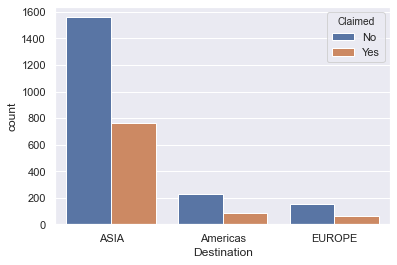

In [75]:
sns.countplot(insurance['Destination'], hue  = insurance['Claimed'])
printmd('**Perecntage wise tabulation of Destination as per insurance claim status :**')
print(round(pd.crosstab(index = insurance['Claimed'], columns = insurance['Destination']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Destination Variable according to insurance claim status :**')

**Perecntage wise tabulation of insurance products as per insurance claim status :**

Product Name  Bronze Plan  Cancellation Plan  Customised Plan  Gold Plan  \
Claimed                                                                    
No                  61.28              93.17            76.36      35.78   
Yes                 38.72               6.83            23.64      64.22   

Product Name  Silver Plan  
Claimed                    
No                  28.74  
Yes                 71.26  


**Countplot of Product Name Variable according to insurance claim status :**

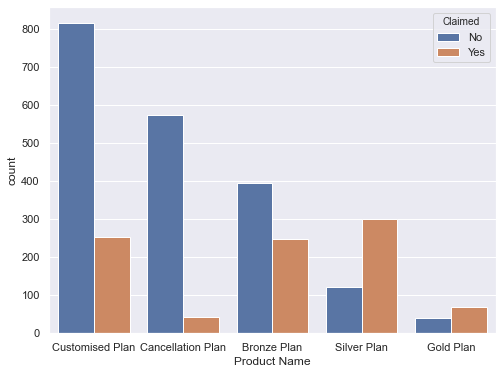

In [76]:
plt.figure(figsize =(8,6))
sns.countplot(insurance['Product Name'], hue  = insurance['Claimed'])
printmd('**Perecntage wise tabulation of insurance products as per insurance claim status :**')
print(round(pd.crosstab(index = insurance['Claimed'], columns = insurance['Product Name']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Product Name Variable according to insurance claim status :**')

**Perecntage wise tabulation of distribution channels as per insurance claim status :**

Channel  Offline  Online
Claimed                 
No         63.04    68.1
Yes        36.96    31.9


**Countplot of Channel Variable according to insurance claim status :**

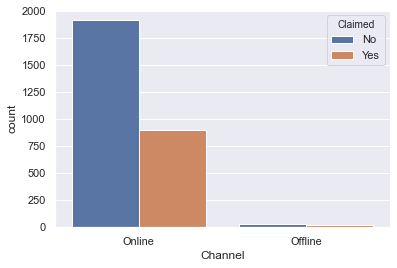

In [77]:
sns.countplot(insurance['Channel'], hue  = insurance['Claimed'])
printmd('**Perecntage wise tabulation of distribution channels as per insurance claim status :**')
print(round(pd.crosstab(index = insurance['Claimed'], columns = insurance['Channel']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Channel Variable according to insurance claim status :**')

**Perecntage wise tabulation of Type of Tour firm as per insurance claim status :**

Type     Airlines  Travel Agency
Claimed                         
No          49.35          80.57
Yes         50.65          19.43


**Countplot of Type Variable according to insurance claim status :**

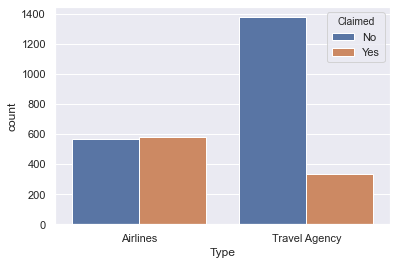

In [78]:
sns.countplot(insurance['Type'], hue  = insurance['Claimed'])
printmd('**Perecntage wise tabulation of Type of Tour firm as per insurance claim status :**')
print(round(pd.crosstab(index = insurance['Claimed'], columns = insurance['Type']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Type Variable according to insurance claim status :**')

**Perecntage wise tabulation of different Agencies as per insurance claim status :**

Agency_Code    C2B    CWT    EPX    JZI
Claimed                                
No           39.41  70.28  84.49  87.39
Yes          60.59  29.72  15.51  12.61


**Countplot of Agency_Code Variable according to insurance claim status :**

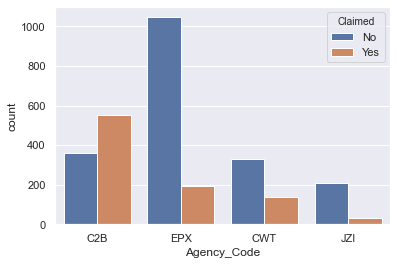

In [79]:
sns.countplot(insurance['Agency_Code'], hue  = insurance['Claimed'])
printmd('**Perecntage wise tabulation of different Agencies as per insurance claim status :**')
print(round(pd.crosstab(index = insurance['Claimed'], columns = insurance['Agency_Code']).apply(lambda x: x*100/x.sum()),2))
printmd('**Countplot of Agency_Code Variable according to insurance claim status :**')

## Inference:
- **'Destination' :** In all the different Destinations the percentage of people who claimed insurance is lower than people who didn't.
- **Product Name :** In Bronze and  Customized plan the percentage of insurance claims are less. In the Cancellation plan the percentage of insurance claims is least. **But in Gold and Silver plan the percentage of insurance claims is much higher.**
- **Channel :** Both in online and offline channels he percentage of people who claimed insurance is lower than people who didn't.
- **Type :** For 'Travel Agency' type tour firms the insurance claims are much less. **But for 'Airlines' type tour firms percentage of people who claim insurance and who don't claim are nearly equal.**
- **Agency_Code :** For the tour agencies with Agency code 'CWT', 'EPX' and 'JZI', the percentage of people who claimed insurance is lesser than people who didn't. **But for 'C2B' the percentage of people claimed insurance is much higher than who didn't.**

## Multivariate Analysis

**Pairwise scatter plot between the variables :**

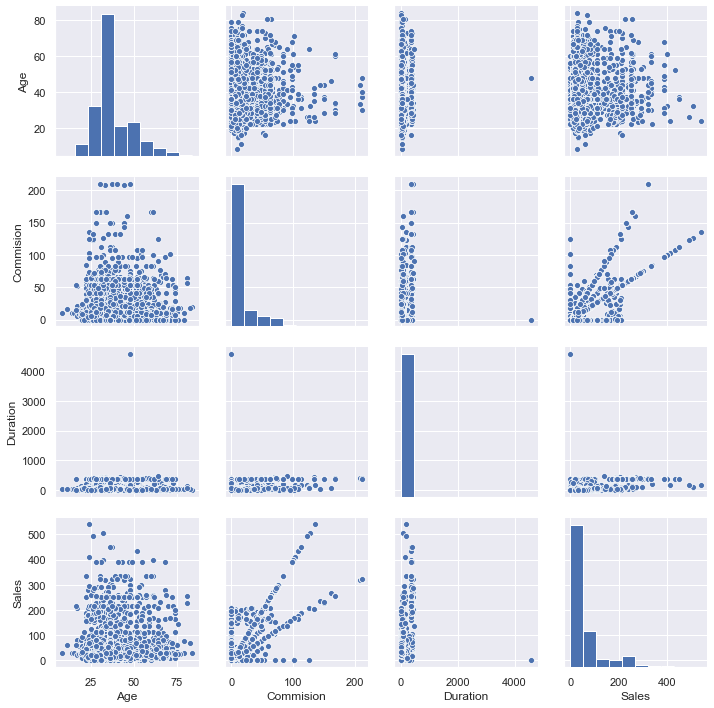

In [80]:
sns.pairplot(insurance)
printmd('**Pairwise scatter plot between the variables :**')

## Inference:
- 'Sales' and 'Commision' show two trajectories in the scatter plot. This suggests that one variable increases with the other varible at two different rates, this may be because of some other factors.

**Heatmap showing the correlation values between the variables :**

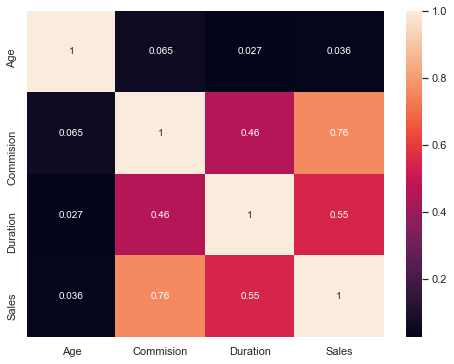

In [81]:
plt.figure(figsize = (8,6))
sns.heatmap(insurance.corr(), annot =True)
printmd('**Heatmap showing the correlation values between the variables :**')

In [82]:
printmd('**Correlation Matrix of the variables showing correlation with each other :**')
insurance.corr()

**Correlation Matrix of the variables showing correlation with each other :**

,Age,Commision,Duration,Sales
Age,1.000000,0.064903,0.027389,0.036258
Commision,0.064903,1.000000,0.462440,0.762074
Duration,0.027389,0.462440,1.000000,0.550038
Sales,0.036258,0.762074,0.550038,1.000000


## Inference:
- The correlation between variables is not high enough to be worried about collinearity issue. 'Commision' and 'Sales' has highest correaltion coefficient of 0.76. 

# Overall Inferences from EDA:
- There are no null values in the dataset. There are 139 duplicate instances in the dataset, these duplicates may the same person with exact same details for all the variables booking a tour or may be redundant entry due to same fault. The chances of all the variables including 'Age', 'Sales', 'Duration', even 'Claimed' status for booking the tour for the second time to remain exactly same is less and hence the duplicate records will be treated as redundant records here. Thus the duplicate instances are dropped.
- Description of the Numerical variables:
    - **'Age'** variable has the mean and median nearly same, hence it is not expected to be skewed. Minimum age of insured is 8 and maximum age is 84.
    - **'Commision'** variable has very high mean compared to the median and so it is expected to be right skewed. There are 139 instances when the tour insurance did not receive any commisions.
    - **'Duration'** variable has very high mean compared to the median and so it is expected to be right skewed. **There seems to be out of context data present in the variable. As the Duration of the tour should be at least greater than 0. There are '3' such instances which have duration less than or equal to '0'. As there are only 3 such instances i.e. nearly 0.1% of dataset, the instances may be dropped, or duration value imputed or kept as it is.** Also note that there is a maximum value of 4580 which is around 10 times higher than the second highest of 466.
    - **'Sales'** variable has very high mean compared to the median and so it is expected to be right skewed. There are 52 instances where there is no sale of insurance policies and hence there should be no claim of insurance as well for these instances. **This is verified and found to be correct, hence there is no anamoly.**
- Description of the categorical variables: 
    - **'Agency_Code' :** There are four tour firms/agencies which are represented by the codes: 'EPX', 'C2B', 'CWT', 'JZI'.
    - **'Type' :** There are two types of tour firms: 'Airlines' and 'Travel Agency'. The Agencies with code 'C2B' and 'JZI' are 'Airlines' type and the agencies with code 'CWT' and 'EPX' are 'Travel Agency' type.
    - **'Claimed' :** It is the status of the insurance claimed by the insured. If insurance is claimed, it is denoted by 'Yes' otherwise by 'No'. **It is our target or dependent variable. Imbalance in class is observed as 'Yes' is only around 32% of the instances and 'No' is around 68%. Thus 'No' is our majority class and 'Yes' minority class** 
    - **'Channel' :** There are two distribution channels of the tour agencies: 'Online' and 'Offline'. Around 98.4% of the distribution in the dataset is done online.
    - **'Product Name' :** There are five insurance products provided, they are : 'Customised Plan', 'Bronze Plan', 'Cancellation Plan', 'Silver Plan' and 'Gold Plan'. The highest and lowest number of choosen plans are 'Customised Plan' and 'Gold Plan' respectively. 
    - **'Destination' :** There are three Destination choices 'ASIA', 'Americas' and 'EUROPE'. Most of the tours around 81%  are to 'ASIA'.
- From Histogram and skewness calculations it is observed that all the continuous variables are right skewed with 'Duration' having the highest skewness. From boxplot it is observed that there are outliers present in all the continuous variables. Also from scatterplot, correlation coefficients it is observed that the 'Sales' and 'Commisions' have a correlation coefficient of 0.762.**Since the correlation is not so high collinearity is not a matter of concern. The outliers are not treated, the model is expected to handle it.**

## Train-Test Split and building the base models for CART, Random Forest, Artificial Neural Network.

### Note: The outliers are not treated, although CART and Random Forest are not sensitive to outliers, ANN is sensitive to outliers.


## Data type Conversion
- **For running CART, Random Forest and Artificial Neural Network models in python, the variables with object data types  need to be converted to integer data type.** 

In [83]:
for feature in insurance.columns: 
    if insurance[feature].dtype == 'object':
        insurance[feature] = pd.Categorical(insurance[feature]).codes 

In [84]:
printmd('**Information of the Dataset after datatype conversion:**')
insurance.info()

**Information of the Dataset after datatype conversion:**

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2858 entries, 0 to 2999
Data columns (total 10 columns):
Age             2858 non-null int64
Agency_Code     2858 non-null int8
Type            2858 non-null int8
Claimed         2858 non-null int8
Commision       2858 non-null float64
Channel         2858 non-null int8
Duration        2858 non-null int64
Sales           2858 non-null float64
Product Name    2858 non-null int8
Destination     2858 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 208.4 KB


## Inference:
- It can observed from the information above that all object data type variables are converted to 'int8' data type.
- All the variables now have numerical datatype.

## Separation of Dependent and Independent variable:
- **Before splitting the dataset into Training and Testing set the dependent variable is required to be separated from the independent variables.**
- **The dependent or target variable is 'Claimed' variable and all other variables in the dataset are independent variables.**

In [85]:
y = insurance['Claimed']
x = insurance.drop('Claimed', axis = 1)

## Splitting into Training and Testing :
- **Splitting the dataset in 70% training and 30% testing set. A random_state = 42 is used for the train-test split.**

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [87]:
print('Number of instances in Training set :', len(x_train))
print('Percentage of instances that didn\'t claimed insurance in training set', round(y_train.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of instances that claimed insurance in training set', round(y_train.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Training set : 2000
Percentage of instances that didn't claimed insurance in training set 67.45
Percentage of instances that claimed insurance in training set 32.55


In [88]:
print('Number of instances in Testing set :', len(x_test))
print('Percentage of instances that didn\'t claimed insurance in testg set', round(y_test.value_counts('Normalize').iloc[0]*100,2))
print('Percentage of instances that claimed insurance in testing set', round(y_test.value_counts('Normalize').iloc[1]*100,2))

Number of instances in Testing set : 858
Percentage of instances that didn't claimed insurance in testg set 69.35
Percentage of instances that claimed insurance in testing set 30.65


## Inferences:
- The number of instances in Training set is 2000 out of which 67.45% are instances who didn't claim insurance and 32.55% are instances that claimed insurance.
- The number of instances in Testing set is 858 out of which 69.35% are instances who didn't claim insurance and 30.65% are instances that claimed insurance.

## Building the Base Models:
- Here we will build the basic models of CART, Random Forest and ANN with the default hyperparameters.
- **Optimization of hyperparameters is a iterative process where we tune the hyperparameters and observe the Performance metrics to further tune the hyperparameters until the model is optimized. It will be done using Grid Search method in the next section.**

## CART :

In [89]:
cart = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state= 42)

## Random Forest:

In [90]:
rf = RandomForestClassifier(n_estimators = 'warn', criterion='gini' , max_features='auto',
                              max_depth = None, min_samples_split=2, min_samples_leaf=1,
                              random_state = 42)

## ANN :
- **ANN model is weight based model and hence it is important that the variables are scaled such that there is no bias in the model due to different magnitude range of variables.**

In [91]:
# Scaling the Train data variables
x_train_ann = sc.fit_transform(x_train)

In [92]:
x_train_ann

array([[ 1.44865423, -0.28160978,  0.80548409, ..., -0.73482374,
         0.26838829,  2.88446533],
       [-0.58727225,  0.72413943,  0.80548409, ..., -0.59313255,
         0.26838829, -0.45596933],
       [-0.2171038 ,  0.72413943,  0.80548409, ..., -0.22838297,
         0.26838829, -0.45596933],
       ...,
       [ 0.33814888, -0.28160978,  0.80548409, ..., -0.31816748,
         0.26838829,  1.214248  ],
       [ 1.81882269,  1.72988863, -1.24148945, ..., -0.3827001 ,
        -1.30804807, -0.45596933],
       [-0.2171038 ,  0.72413943,  0.80548409, ...,  0.24859725,
        -0.51982989, -0.45596933]])

## Note:
- **While scaling the test data variables, it should be transformed on the corresponding mean and standard deviation variables of the training data.** This is done such that the transformation of testing is uniform with the transformation of training data. Also test data is treated equivalent to unseen data and hence we may sometime have to predict a single instance for which the scaling cannot be done on its own distribution and has to be done using the parameters of the training data.

In [93]:
x_test_ann = sc.transform(x_test)

In [94]:
x_test_ann

array([[-0.9574407 , -1.28735898, -1.24148945, ...,  0.13636661,
         1.84482465, -0.45596933],
       [-1.32760915, -1.28735898, -1.24148945, ...,  0.4590297 ,
         1.84482465, -0.45596933],
       [ 1.35611212, -1.28735898, -1.24148945, ...,  3.21920203,
         1.84482465, -0.45596933],
       ...,
       [ 0.06052254,  1.72988863, -1.24148945, ..., -0.56507489,
        -1.30804807, -0.45596933],
       [ 2.09644902, -1.28735898, -1.24148945, ..., -0.32658478,
         1.84482465, -0.45596933],
       [-1.42015126,  1.72988863, -1.24148945, ..., -0.14420999,
        -1.30804807, -0.45596933]])

## Inference:
- The train and test data is scaled for ANN model.

In [95]:
ann = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',  solver='adam',
                     learning_rate_init=0.001, max_iter=200, tol=0.0001, 
                     random_state = 42)

## AIM of Modelling :
- The two most important things we need to consider while optimizing the model are:
    - **Importance of Class prediction :** It is mentioned that the insurance firm providing tour insurance is facing higher claim frequency. So, the prediction of ‘Yes’ class i.e. a person who is to claim insurance is more important to us than the prediction of ‘No’ class i.e. a person who is not going to claim insurance.
    - **Class Imbalance :** The Target variable is imbalanced with the minority class as ‘Yes’ constituting only 32% of the dataset.
- Now, we have different evaluation metrics to check the performance of the model, we need to first decide which metrics are more important or relevant to our case study. For this we need to understand what each metric tells us about the model and then according to our case study we need to choose the most relevant metric(s). 
- Before this we need to explain the Target classes in terms of evaluation metrics. Here the target class ‘Yes’ will be ‘Positive’ and the target class ‘No’ will be ‘Negative’.  According to conformity of predicted class and actual class of the claim status we can have four outcomes.
    - True Positive (TP): In our case, when the model predicts that the claim status as ‘Yes’ and the actual claim status is also ‘Yes’.
    - False Positive (FP): In our case, when the model predicts that the claim status as ‘Yes’  but the actual claim status is ‘No’. This is also called ‘Type I’ error.
    - True Negative (TN): In our case, when the model predicts that the claim status as ‘No’ and the actual claim status is also ‘No’.
    - False Negative (FN): In our case, when the model predicts that the claim status as ‘No’ but the actual claim status is ‘Yes’. This is also called ‘Type II’ error.
- **Effect of class Imbalance on the above measures:** Since our majority class is 'No', there will be higher predicted number of Negatives in the Dataset which will make the count of TN and FN comparatively higher than the predicted Positives i.e. TP and FP. 
- **Cost of Errors:** According to business situation a particular type of error may be costlier to us. In our case as the prediction of insurance claimers is more important, we wouldn’t not want to predict an insurance claimer as non claimer (FN). **Thus FN or type II error is more important to us.**
- **Evaluation Metric for Grid Search optimization:**
    - **Accuracy :** In case of imbalanced dataset since Negatives are very high a model can have high accuracy even when TP predictions are less. Thus it is not a good measure to evaluate the model for our case study.
    - **Precision, Recall & F1 score :** A higher value of precision indicates lower value of Type I error and a higher value of recall indicates lower value of Type II error. For a particular model both Precision and Recall cannot be increased simultaneously, when one increases the other decreases. It depends on which error is costlier to us we choose which metric to improve. **Moreover in case of imbalanced datasets the minority class generally has higher precision as compared to Recall. Since type II Error is more costly and also since due to imbalance the recall of minority class is already low, hence we will optimize the model to give higher Recall for the minority class. But it must be kept in mind since we are keeping the threshold fixed at 0.5 we can only improve the recall of the minority class to a certain extent in imbalanced datasets.** F1 score keeps the balance between Recall and Precision, it is preferred when both type I errors and type II errors are equally important to us, i.e. misclassifications are not preferred.
    - **AUC score:** It tells us about the overall capability of the model to distinguish between the two classes. Since it averages the prediction capability of the model over all possible thresholds it is not preferred in case of imbalanced datasets.

**Finally according to above understanding, Recall will be used as a scoring for Grid Search.** Although these metrics are not used for optimization while evaluating the overall model performance we will consider these metrics as well.

## Tuning the hyperparameters of the models using Grid Search :

## CART:
- Steps to decide the hyperparameters to be provided for Grid Search: 
    1. For the **'max_depth'** hyperparameter, we will look at the full grown Decision Tree and observe from the tree, the possible levels of pruning based the symmetry of growth of branches of the decision tree.
    2. For the **'min_samples_leaf'**  hyperparameter we will choose in the range 0.1 % - 1 % of the training dataset.
    3. For the **'min_samples_split'** hyperparameter we will choose values around three times that of the 'min_samples_leaf' hyperparameter.

### Deciding the max_depth hyperparameter tuning range:

In [96]:
cart.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [97]:
train_char_label = ['No', 'Yes']
insurance_tree_file = open('C:\\Users\\Lenovo\\Data\\week 18 & 19\\insurance.dot', 'w')
dot_data = export_graphviz(cart, out_file = insurance_tree_file, feature_names = list(x), 
                           class_names = 'train_char_label')
insurance_tree_file.close()

## Inference:
- From the upruned decision tree it is observed that a max_depth of maximum 14 could be choosen as after 14 levels the decision tree branches doesn't grow uniformly. A range of 4 to 14 will be tried.

In [98]:
param_grid = {
              'max_depth' : [4,5,6,7,8,9,10,11,12,13,14],
              'min_samples_leaf' : [ 2, 4, 6, 8, 10, 15, 20],
              'min_samples_split' : [10, 15, 20, 25, 30, 35, 40, 50, 60]
}

In [99]:
grid_search_cart = GridSearchCV(estimator = cart, param_grid = param_grid, cv =10, scoring = 'recall' )

In [100]:
grid_search_cart.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'min_samples_leaf': [2, 4, 6, 8, 1

In [101]:
printmd('**The best hyperparameters for CART model among the provided input after tuning using Grid Search :**')
grid_search_cart.best_params_

**The best hyperparameters for CART model among the provided input after tuning using Grid Search :**

{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 20}

In [102]:
best_grid_cart = grid_search_cart.best_estimator_

## Evaluation Metrics for Tuning:

In [103]:
train_predict_cart = best_grid_cart.predict(x_train)
test_predict_cart = best_grid_cart.predict(x_test)

# TRAIN

print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, train_predict_cart))
# Train AUC Score
probs = best_grid_cart.predict_proba(x_train)
probs_train_cart = probs[:, 1]
auc = roc_auc_score(y_train, probs_train_cart)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, test_predict_cart))
# AUC Score
probs = best_grid_cart.predict_proba(x_test)
probs_test_cart = probs[:, 1]
auc = roc_auc_score(y_test, probs_test_cart)
print('AUC Score Testing Data: %.3f' % auc)


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1349
           1       0.70      0.64      0.67       651

    accuracy                           0.80      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.79      0.80      0.79      2000

AUC Score Training Data: 0.851

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       595
           1       0.66      0.63      0.65       263

    accuracy                           0.79       858
   macro avg       0.75      0.74      0.75       858
weighted avg       0.79      0.79      0.79       858

AUC Score Testing Data: 0.793


## Inference:
- The Best Parameter from above Grid Search is found to be:
    - **max_depth = 7, min_samples_leaf = 2, min_samples_split = 20**

## Random Forest :
- The following range of hyperparameters are tried: 
    1. For the **'max_depth'** hyperparameter, is kept in the range after observing the cart model hyperparameter performance.
    2. For the **'min_samples_leaf'**  hyperparameter we will choose in the range 0.1 % - 1 % of the training dataset.
    3. For the **'min_samples_split'** hyperparameter is kept on higher side to avoid high pruning.
    4. For **'max_features'** hyperparameter, ideal it is square root of number of independent variables, which is 3 in our case, we try out other values around it. Higher values are not taken to keep the randomization element.
    5. For **'n_estimators'** hyperparameter 200, 300.

**The entire range below in param_grid is not entirely taken at a time since running random forest takes a lot of time. Rather, it is tried out in pairs and then moved in either direction and the hyperparameter values noted. Finally from these values, the range is kept below for final run.**

In [104]:
param_grid = {
    'max_depth': [4, 5, 6, 7, 8, 9],
    'max_features': [3, 4, 5, 6],
    'min_samples_leaf': [2, 4, 8, 15, 20],
    'min_samples_split': [10, 15, 25, 45, 60],
    'n_estimators': [200, 300]
}

In [105]:
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv =3, scoring = 'recall' )

In [106]:
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [107]:
printmd('**The best hyperparameters for Random Forest model among the provided input after tuning using Grid Search :**')
grid_search_rf.best_params_

**The best hyperparameters for Random Forest model among the provided input after tuning using Grid Search :**

{'max_depth': 5,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 25,
 'n_estimators': 300}

In [108]:
best_grid_rf = grid_search_rf.best_estimator_

## Evaluation Metrics:

In [109]:
train_predict_rf = best_grid_rf.predict(x_train)
test_predict_rf = best_grid_rf.predict(x_test)

# TRAIN

print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, train_predict_rf))
# Train AUC Score
probs = best_grid_rf.predict_proba(x_train)
probs_train_rf = probs[:, 1]
auc = roc_auc_score(y_train, probs_train_rf)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, test_predict_rf))
# AUC Score
probs = best_grid_rf.predict_proba(x_test)
probs_test_rf = probs[:, 1]
auc = roc_auc_score(y_test, probs_test_rf)
print('AUC Score Testing Data: %.3f' % auc)


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1349
           1       0.69      0.61      0.65       651

    accuracy                           0.78      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.78      0.78      0.78      2000

AUC Score Training Data: 0.838

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       595
           1       0.70      0.66      0.68       263

    accuracy                           0.81       858
   macro avg       0.78      0.77      0.77       858
weighted avg       0.81      0.81      0.81       858

AUC Score Testing Data: 0.841


## Inference:
- The Best Parameter from above Grid Search is found to be:
    - **max_depth = 5, min_samples_leaf = 2, min_samples_split = 25, max_features = 5, n_estimators = 300**

## ANN :
- The following range of hyperparameters are tried: 
    1. **'hidden_layer_sizes' :** Two and one hidden layers with a range of neurons is tried.
    2. **'max_iter' :** It is fixed at a higher value so that the alogorithm stops on basis of 'tol' and if any infinite loop situation arise it can still stop the algorithm.
    3. **'solver' :** 'sgd' and 'adam' are used.
    4. **'learning_rate_init' :** It is tried around the default value of 0.001.
    5. **'activation' :** Only 'relu' is used as it is the most popular among the available activation functions in MLPClassifier.
    6. **'tol' :** It is tried around the default value of 0.0001.
    

**The entire range below in param_grid is not entirely taken at a time since running multiple hidden layers of neural network takes a lot of time. Rather, it is tried out in pairs and then moved in either direction and the hyperparameter values noted. Finally from these values, the range is kept below for final run.**

In [110]:
param_grid = {
    'hidden_layer_sizes': [ 30, (30,30), (50), (50,50), 70, (70,70) ], 
    'max_iter': [7000],
    'solver': ['sgd', 'adam'], 
    'learning_rate_init' : [0.001, 0.005, 0.01],
    'activation' : ['relu'],
    'tol': [0.001, 0.005,  0.0001], 
    }

In [111]:
grid_search_ann = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 10, scoring = 'recall' )

In [112]:
grid_search_ann.fit(x_train_ann, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [30, (30, 30), 50, (50, 50), 70,
                    

In [113]:
printmd('**The best hyperparameters for ANN model among the provided input after tuning using Grid Search :**')
grid_search_ann.best_params_

**The best hyperparameters for ANN model among the provided input after tuning using Grid Search :**

{'activation': 'relu',
 'hidden_layer_sizes': (70, 70),
 'learning_rate_init': 0.005,
 'max_iter': 7000,
 'solver': 'adam',
 'tol': 0.005}

In [114]:
best_grid_ann = grid_search_ann.best_estimator_

## Evaluation Metrics:

In [115]:
train_predict_ann = best_grid_ann.predict(x_train_ann)
test_predict_ann = best_grid_ann.predict(x_test_ann)

# TRAIN

print('''
---------------------------------------------------TRAIN-------------------------------------------------------
''')
printmd('**Classification Report Training Data:**')
print(classification_report(y_train, train_predict_ann))
# Train AUC Score
probs = best_grid_ann.predict_proba(x_train_ann)
probs_train_ann = probs[:, 1]
auc = roc_auc_score(y_train, probs_train_ann)
print('AUC Score Training Data: %.3f' % auc)


# TEST

print('''
---------------------------------------------------TEST-------------------------------------------------------
''')
printmd('**Classification Report Testing Data:**')
print(classification_report(y_test, test_predict_ann))
# AUC Score
probs = best_grid_ann.predict_proba(x_test_ann)
probs_test_ann = probs[:, 1]
auc = roc_auc_score(y_test, probs_test_ann)
print('AUC Score Testing Data: %.3f' % auc)


---------------------------------------------------TRAIN-------------------------------------------------------



**Classification Report Training Data:**

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1349
           1       0.67      0.60      0.63       651

    accuracy                           0.77      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.77      0.77      0.77      2000

AUC Score Training Data: 0.824

---------------------------------------------------TEST-------------------------------------------------------



**Classification Report Testing Data:**

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       595
           1       0.68      0.64      0.66       263

    accuracy                           0.80       858
   macro avg       0.76      0.75      0.76       858
weighted avg       0.79      0.80      0.79       858

AUC Score Testing Data: 0.841


## Inference:
- The Best Parameter from above Grid Search is found to be:
    - **hidden_layer_sizes = (70,70), max_iter = 7000, solver = 'adam', learning_rate_init = 0.005, activation = 'relu', tol = 0.005**

## Note:
**Since imbalance of the Target class is not addressed in the models above, we can see in all the three models that the Recall, Precision and F1-score is much lesser for the minority class as compared to the majority class.**

## Performance Metrics on Train and Test sets using Accuracy, Confusion Matrix, ROC_AUC score and ROC curves:

In [116]:
# CART Performance

# Train
df_cart_train = pd.DataFrame(classification_report(y_train, train_predict_cart, output_dict = True))
cart_train_acc = df_cart_train.iloc[0,2]
cart_train_recall = df_cart_train.iloc[1,1]
cart_train_precision = df_cart_train.iloc[0,1]
cart_train_f1 = df_cart_train.iloc[2,1]

# Test
df_cart_test = pd.DataFrame(classification_report(y_test, test_predict_cart, output_dict = True))
cart_test_acc = df_cart_test.iloc[0,2]
cart_test_recall = df_cart_test.iloc[1,1]
cart_test_precision = df_cart_test.iloc[0,1]
cart_test_f1 = df_cart_test.iloc[2,1]

# CART Confusion Matrix

# Train
cart_train_TP = confusion_matrix(y_train, train_predict_cart)[1,1]
cart_train_FP = confusion_matrix(y_train, train_predict_cart)[0,1]
cart_train_TN = confusion_matrix(y_train, train_predict_cart)[0,0]
cart_train_FN = confusion_matrix(y_train, train_predict_cart)[1,0]

# Test
cart_test_TP = confusion_matrix(y_test, test_predict_cart)[1,1]
cart_test_FP = confusion_matrix(y_test, test_predict_cart)[0,1]
cart_test_TN = confusion_matrix(y_test, test_predict_cart)[0,0]
cart_test_FN = confusion_matrix(y_test, test_predict_cart)[1,0]



In [117]:
# RF Performance

# Train
df_rf_train = pd.DataFrame(classification_report(y_train, train_predict_rf, output_dict = True))
rf_train_acc = df_rf_train.iloc[0,2]
rf_train_recall = df_rf_train.iloc[1,1]
rf_train_precision = df_rf_train.iloc[0,1]
rf_train_f1 = df_rf_train.iloc[2,1]

# Test
df_rf_test = pd.DataFrame(classification_report(y_test, test_predict_rf, output_dict = True))
rf_test_acc = df_rf_test.iloc[0,2]
rf_test_recall = df_rf_test.iloc[1,1]
rf_test_precision = df_rf_test.iloc[0,1]
rf_test_f1 = df_rf_test.iloc[2,1]

# RF Confusion Matrix

# Train
rf_train_TP = confusion_matrix(y_train, train_predict_rf)[1,1]
rf_train_FP = confusion_matrix(y_train, train_predict_rf)[0,1]
rf_train_TN = confusion_matrix(y_train, train_predict_rf)[0,0]
rf_train_FN = confusion_matrix(y_train, train_predict_rf)[1,0]

# Test
rf_test_TP = confusion_matrix(y_test, test_predict_rf)[1,1]
rf_test_FP = confusion_matrix(y_test, test_predict_rf)[0,1]
rf_test_TN = confusion_matrix(y_test, test_predict_rf)[0,0]
rf_test_FN = confusion_matrix(y_test, test_predict_rf)[1,0]


In [118]:
# ANN Performance

# Train
df_ann_train = pd.DataFrame(classification_report(y_train, train_predict_ann, output_dict = True))
ann_train_acc = df_ann_train.iloc[0,2]
ann_train_recall = df_ann_train.iloc[1,1]
ann_train_precision = df_ann_train.iloc[0,1]
ann_train_f1 = df_ann_train.iloc[2,1]

# Test
df_ann_test = pd.DataFrame(classification_report(y_test, test_predict_ann, output_dict = True))
ann_test_acc = df_ann_test.iloc[0,2]
ann_test_recall = df_ann_test.iloc[1,1]
ann_test_precision = df_ann_test.iloc[0,1]
ann_test_f1 = df_ann_test.iloc[2,1] 

# ANN Confusion Matrix

# Train
ann_train_TP = confusion_matrix(y_train, train_predict_ann)[1,1]
ann_train_FP = confusion_matrix(y_train, train_predict_ann)[0,1]
ann_train_TN = confusion_matrix(y_train, train_predict_ann)[0,0]
ann_train_FN = confusion_matrix(y_train, train_predict_ann)[1,0]

# Test
ann_test_TP = confusion_matrix(y_test, test_predict_ann)[1,1]
ann_test_FP = confusion_matrix(y_test, test_predict_ann)[0,1]
ann_test_TN = confusion_matrix(y_test, test_predict_ann)[0,0]
ann_test_FN = confusion_matrix(y_test, test_predict_ann)[1,0]

##  CART Model Importance Feature Output:

In [119]:
printmd('**The normalised importance of different variables using CART model:**')
print (pd.DataFrame(best_grid_cart.feature_importances_, columns = ["Importance"], index = x_train.columns)
       .sort_values('Importance',ascending=False))

**The normalised importance of different variables using CART model:**

              Importance
Agency_Code     0.456016
Sales           0.201742
Product Name    0.108666
Duration        0.086587
Commision       0.083193
Age             0.053534
Destination     0.010263
Type            0.000000
Channel         0.000000


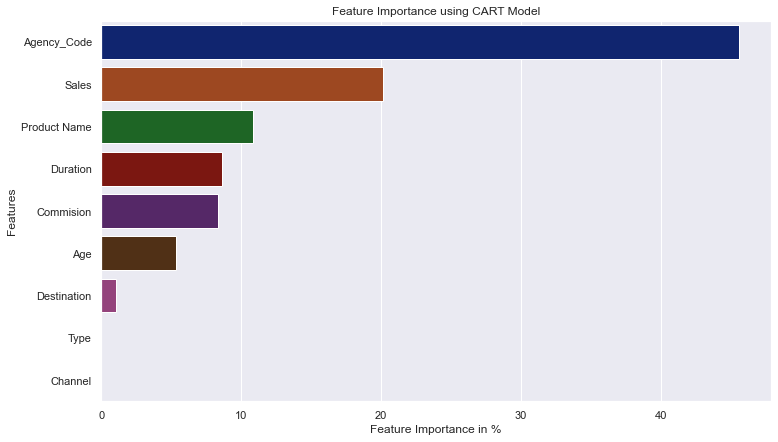

In [120]:
imp_cart = pd.DataFrame (best_grid_cart.feature_importances_*100, index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(imp_cart[0], imp_cart.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using CART Model')
plt.show()

## Inference :
- 'Agency_Code' variable is the most important feature in CART model. **This means the tour agency thorugh which booking is done has higher impact in classifying the insurance claim status.**

## Final Performance Metrics CART :

**ROC Curve of CART Model of Train and Test dataset :**

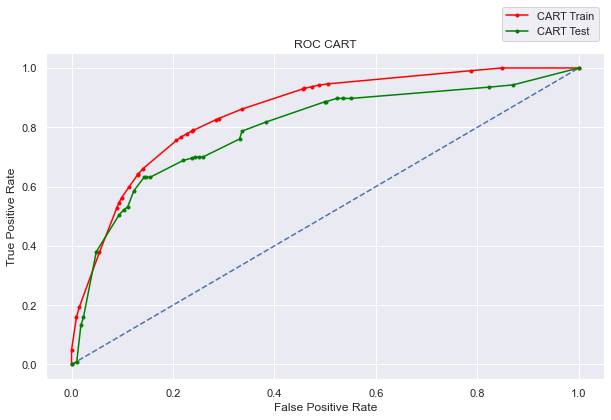

In [121]:
# ROC curve CART

fpr_train_cart, tpr_train_cart, thresholds_train_cart = roc_curve(y_train, probs_train_cart)
fpr_test_cart, tpr_test_cart, thresholds_test_cart = roc_curve(y_test, probs_test_cart)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_cart, tpr_train_cart,marker='.',color='red',label="CART Train")
plt.plot(fpr_test_cart, tpr_test_cart,marker='.',color='green',label="CART Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CART')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of CART Model of Train and Test dataset :**')

In [122]:
# AUC
cart_train_auc = roc_auc_score(y_train, probs_train_cart)
print('AUC Score Training Data of CART model: %.3f' % cart_train_auc)
cart_test_auc = roc_auc_score(y_test, probs_test_cart)
print('AUC Score Testing Data of CART model: %.3f' % cart_test_auc)

AUC Score Training Data of CART model: 0.851
AUC Score Testing Data of CART model: 0.793


In [123]:
# Confusion Matrix
printmd('**Train Confusision Matrix for CART model :**')
print(confusion_matrix(y_train, train_predict_cart))
printmd('**Test Confusision Matrix for CART model :**')
print(confusion_matrix(y_test, test_predict_cart))

**Train Confusision Matrix for CART model :**

[[1173  176]
 [ 234  417]]


**Test Confusision Matrix for CART model :**

[[510  85]
 [ 97 166]]


In [124]:
# Classifiaction Report CART
printmd('**Train Classification Report for CART model :**')
print(classification_report(y_train, train_predict_cart))
printmd('**Test Classification Report for CART model :**')
print(classification_report(y_test, test_predict_cart))

**Train Classification Report for CART model :**

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1349
           1       0.70      0.64      0.67       651

    accuracy                           0.80      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.79      0.80      0.79      2000



**Test Classification Report for CART model :**

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       595
           1       0.66      0.63      0.65       263

    accuracy                           0.79       858
   macro avg       0.75      0.74      0.75       858
weighted avg       0.79      0.79      0.79       858



## Inference :
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- **Due to imbalance in insurance claim status, there is high difference in majority class and minority class 'Precision', 'Recall', and 'F1-score'.** This difference is more significant in recall**, even though we have optimized the hyperparameters using recall. For training data minority class 'Recall' is approximately 23% less than majority class 'Recall'. For testing data minority class 'Recall' is also approximately 23% less than majority class 'Recall'.
- The Accuracy for training and testing is approximately 80% and 79% respectively and the AUC for training and testing is approximately 85.1% and 79.3%. The accuracy is nearly same for training and testing data.
- The minority class 'Precision', 'Recall' and 'F1-score' for training set is approximately 70%,  64% and 67% respectively.
- The minority class 'Precision', 'Recall' and 'F1-score' for testing set is approximately 66%,  63% and 65% respectively.
- **No overfit performance metrics are obtained.**

##  Random Forest Model Importance Feature Output:

In [125]:
printmd('**The normalised importance of different variables using Random Forest model :**')
print (pd.DataFrame(best_grid_rf.feature_importances_, columns = ["Importance"], index = x_train.columns)
       .sort_values('Importance',ascending=False))

**The normalised importance of different variables using Random Forest model :**

              Importance
Agency_Code     0.385106
Product Name    0.196596
Sales           0.167067
Commision       0.097937
Duration        0.071037
Age             0.046381
Type            0.021948
Destination     0.009540
Channel         0.004387


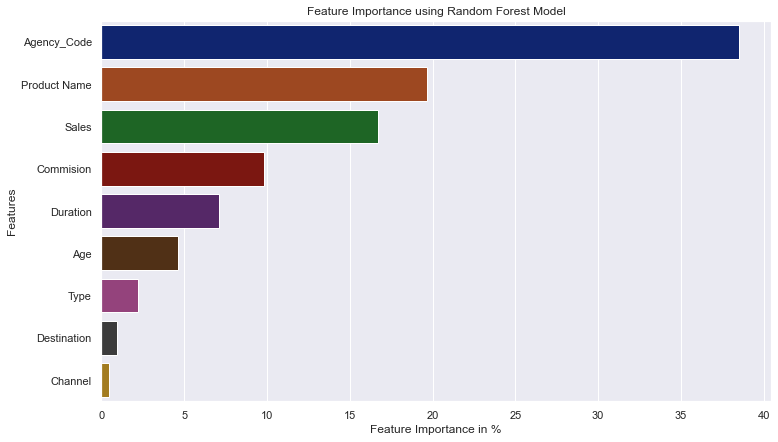

In [126]:
imp_rf = pd.DataFrame (best_grid_rf.feature_importances_*100, index=x_train.columns).sort_values(by=0, ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(imp_rf[0], imp_rf.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest Model')
plt.show()

## Inference :
- 'Agency_Code' variable is the most important feature in  model. **This means the insurance tour agency thorugh which booking is done has higher impact in classifying the insurance claim status.**

## Final Performance Metrics for Random Forest Model:

**ROC Curve of RF Model of Train and Test dataset :**

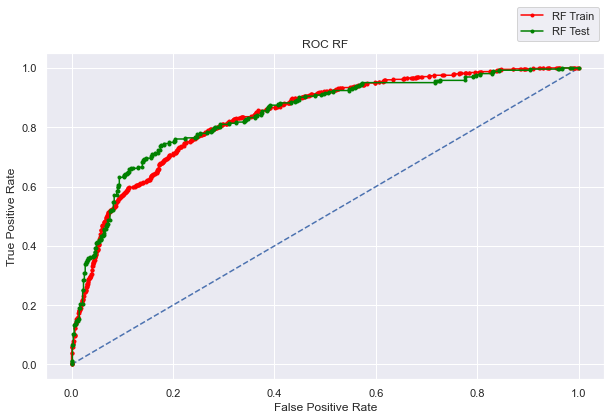

In [127]:
# ROC RF

fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train, probs_train_rf)
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test, probs_test_rf)

plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_rf, tpr_train_rf,marker='.',color='red',label="RF Train")
plt.plot(fpr_test_rf, tpr_test_rf,marker='.',color='green',label="RF Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RF')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of RF Model of Train and Test dataset :**')

In [128]:
# AUC RF
rf_train_auc = roc_auc_score(y_train, probs_train_rf)
print('AUC Score Training Data of Random Forest model: %.3f' % rf_train_auc)
rf_test_auc = roc_auc_score(y_test, probs_test_rf)
print('AUC Score Testing Data of CART model: %.3f' % rf_test_auc)

AUC Score Training Data of Random Forest model: 0.838
AUC Score Testing Data of CART model: 0.841


In [129]:
# RF confusion Metrics
printmd('**Train Confusision Matrix for RF model :**')
print(confusion_matrix(y_train, train_predict_rf))
printmd('**Test Confusision Matrix for RF model :**')
print(confusion_matrix(y_test, test_predict_rf))

**Train Confusision Matrix for RF model :**

[[1175  174]
 [ 257  394]]


**Test Confusision Matrix for RF model :**

[[522  73]
 [ 89 174]]


In [130]:
# Classifiaction Report RF
printmd('**Train Classification Report for RF model :**')
print(classification_report(y_train, train_predict_rf))
printmd('**Test Classification Report for RF model :**')
print(classification_report(y_test, test_predict_rf))

**Train Classification Report for RF model :**

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1349
           1       0.69      0.61      0.65       651

    accuracy                           0.78      2000
   macro avg       0.76      0.74      0.75      2000
weighted avg       0.78      0.78      0.78      2000



**Test Classification Report for RF model :**

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       595
           1       0.70      0.66      0.68       263

    accuracy                           0.81       858
   macro avg       0.78      0.77      0.77       858
weighted avg       0.81      0.81      0.81       858



## Inference :
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- **Due to imbalance in insurance claim status, there is high difference in majority class and minority class 'Precision', 'Recall', and 'F1-score'.** This difference is more significant in recall than precision, even though we have optimized the hyperparameters using recall. For training data minority class 'Recall' is approximately 26% less than majority class 'Recall'. For testing data minority class 'Recall' is approximately 22% less than majority class 'Recall'.
- The Accuracy for training and testing is approximately 78% and 81% respectively and the AUC for training and testing is approximately 84% for both.
- The minority class 'Precision', 'Recall' and 'F1-score' for training set is approximately 69%,  61% and 65% respectively.
- The minority class 'Precision', 'Recall' and 'F1-score' for testing set is approximately 70%,  66% and 68% respectively.
- The Model performance in all aspects is better for testing data.
- **No overfit performance metrics are obtained.**

## Final Performance Metrics for ANN Model:

**ROC Curve of ANN Model of Train and Test dataset :**

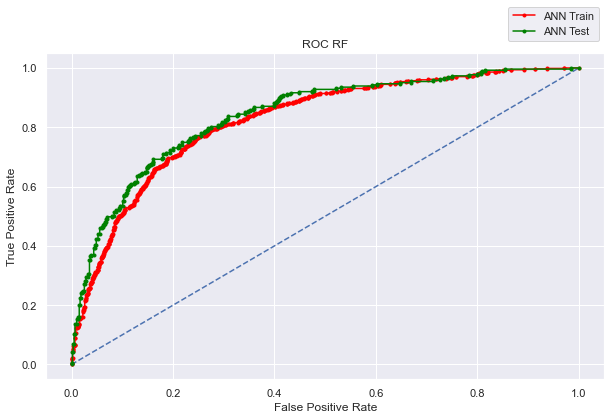

In [131]:
# ROC Curve ANN

fpr_train_ann, tpr_train_ann, thresholds_train_ann = roc_curve(y_train, probs_train_ann)
fpr_test_ann, tpr_test_ann, thresholds_test_ann = roc_curve(y_test, probs_test_ann)


plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_ann, tpr_train_ann,marker='.',color='red',label="ANN Train")
plt.plot(fpr_test_ann, tpr_test_ann,marker='.',color='green',label="ANN Test")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RF')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of ANN Model of Train and Test dataset :**')

In [132]:
# AUC ANN
ann_train_auc = roc_auc_score(y_train, probs_train_ann)
print('AUC Score Training Data of ANN model: %.3f' % ann_train_auc)
ann_test_auc = roc_auc_score(y_test, probs_test_ann)
print('AUC Score Testing Data of CART model: %.3f' % ann_test_auc)

AUC Score Training Data of ANN model: 0.824
AUC Score Testing Data of CART model: 0.841


In [133]:
# Confusion Matrix ANN
printmd('**Train Confusision Matrix for ANN model :**')
print(confusion_matrix(y_train, train_predict_ann))
printmd('**Test Confusision Matrix for ANN model :**')
print(confusion_matrix(y_test, test_predict_ann))

**Train Confusision Matrix for ANN model :**

[[1156  193]
 [ 260  391]]


**Test Confusision Matrix for ANN model :**

[[515  80]
 [ 95 168]]


In [134]:
# Classifiaction Report ANN
printmd('**Train Classification Report for ANN model :**')
print(classification_report(y_train, train_predict_ann))
printmd('**Test Classification Report for ANN model :**')
print(classification_report(y_test, test_predict_ann))

**Train Classification Report for ANN model :**

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1349
           1       0.67      0.60      0.63       651

    accuracy                           0.77      2000
   macro avg       0.74      0.73      0.73      2000
weighted avg       0.77      0.77      0.77      2000



**Test Classification Report for ANN model :**

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       595
           1       0.68      0.64      0.66       263

    accuracy                           0.80       858
   macro avg       0.76      0.75      0.76       858
weighted avg       0.79      0.80      0.79       858



## Inference :
- **The performance metrics of Train and Test data are within +/- 10% of each other, which is positive sign.**
- **Due to imbalance in insurance claim status, there is high difference in majority class and minority class 'Precision', 'Recall', and 'F1-score'.** This difference is more significant in recall, even though we have optimized the hyperparameters using recall. For training data minority class 'Recall' is approximately 26% less than majority class 'Recall'. For testing data minority class 'Recall' is also approximately 23% less than majority class 'Recall'.
- The Accuracy for training and testing is approximately 77% and 80% respectively and the AUC for training and testing is approximately 82% and 84% respectively.
- The minority class 'Precision', 'Recall' and 'F1-score' for training set is approximately 67%,  60% and 63% respectively.
- The minority class 'Precision', 'Recall' and 'F1-score' for testing set is approximately 68%,  64% and 66% respectively.
- The Model performance in all aspects is better for testing data.
- **No overfit performance metrics are obtained.**

# Comparing CART, RF and ANN models:

**ROC Curve of CART, RF and ANN for Training set :**

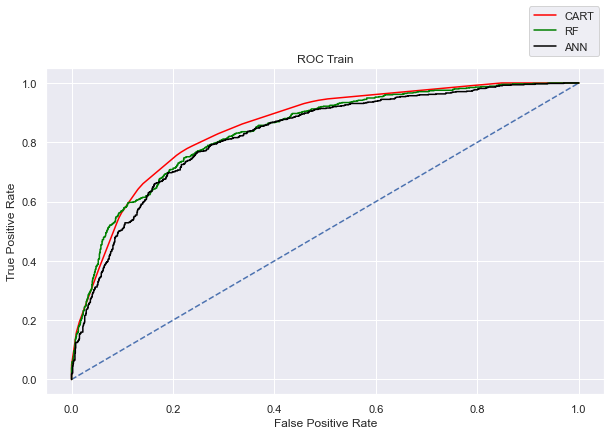

In [135]:
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train_cart, tpr_train_cart,color='red',label="CART")
plt.plot(fpr_train_rf,tpr_train_rf,color='green',label="RF")
plt.plot(fpr_train_ann,tpr_train_ann,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Train')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of CART, RF and ANN for Training set :**')

**ROC Curve of CART, RF and ANN for Testing set :**

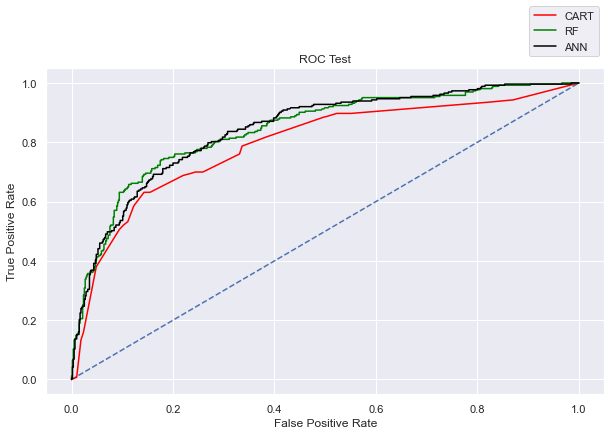

In [136]:
plt.figure(figsize = (10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_test_cart, tpr_test_cart,color='red',label="CART")
plt.plot(fpr_test_rf,tpr_test_rf,color='green',label="RF")
plt.plot(fpr_test_ann,tpr_test_ann,color='black',label="ANN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Test')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
printmd('**ROC Curve of CART, RF and ANN for Testing set :**')

In [137]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
comparision = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'ANN Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'ANN Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
printmd('**Comparision Table of Performane Metrics in Percentage:**')
round(comparision*100,2).T

**Comparision Table of Performane Metrics in Percentage:**

,Accuracy,AUC,Recall,Precision,F1 Score
CART Train,79.50,85.10,64.06,70.32,67.04
CART Test,78.79,79.26,63.12,66.14,64.59
Random Forest Train,78.45,83.76,60.52,69.37,64.64
Random Forest Test,81.12,84.14,66.16,70.45,68.24
ANN Train,77.35,82.39,60.06,66.95,63.32
ANN Test,79.60,84.12,63.88,67.74,65.75


**Comparision of Performance Metrics of CART, RF and ANN for Training set**

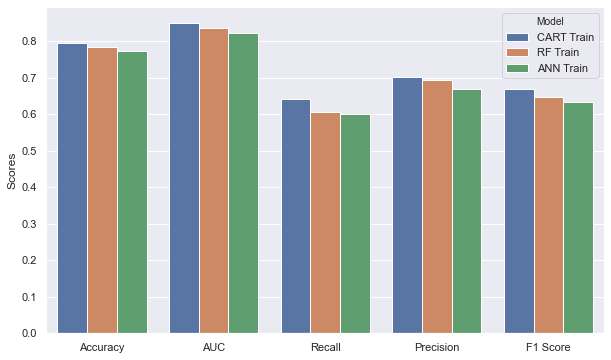

In [138]:
# Train

train_metrics = [cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1,
           rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1,
           ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1]
train_metrics_name =index*3
train_scores = pd.DataFrame(train_metrics, columns = ['Scores'], index = train_metrics_name)
train_models = ['CART Train']*5 + ['RF Train']*5 + ['ANN Train']*5
train_scores['Model'] = train_models


plt.figure(figsize = (10,6))
sns.barplot( y = train_scores['Scores'], x = train_scores.index, hue = train_scores['Model'])
printmd('**Comparision of Performance Metrics of CART, RF and ANN for Training set**')

**Comparision of Performance Metrics of CART, RF and ANN for Testing set**

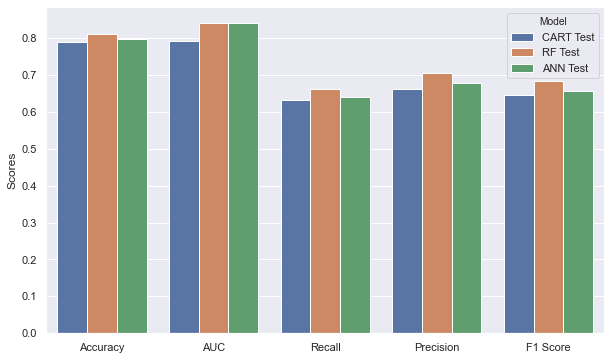

In [139]:
# Test

test_metrics = [cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1,
               rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1,
               ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]
test_metrics_name =index*3
test_scores = pd.DataFrame(test_metrics, columns = ['Scores'], index = test_metrics_name)
test_models = ['CART Test']*5 + ['RF Test']*5 + ['ANN Test']*5
test_scores['Model'] = test_models


plt.figure(figsize = (10,6))
sns.barplot( y = test_scores['Scores'], x = test_scores.index, hue = test_scores['Model'])
printmd('**Comparision of Performance Metrics of CART, RF and ANN for Testing set**')

**Comparision of Prediction counts of CART, RF and ANN for Training set :**

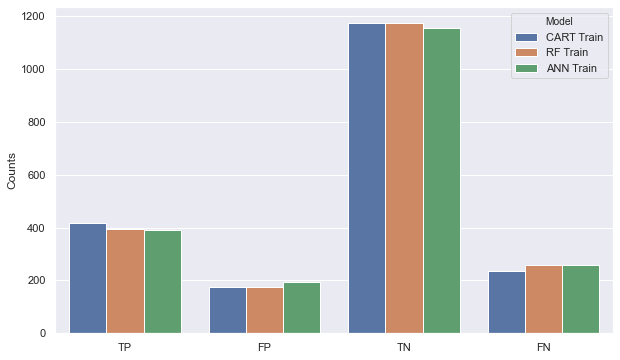

In [140]:
# Train

index = ['TP', 'FP', 'TN', 'FN']
train_predictions = [cart_train_TP, cart_train_FP, cart_train_TN, cart_train_FN,
                     rf_train_TP, rf_train_FP, rf_train_TN, rf_train_FN,
                     ann_train_TP, ann_train_FP, ann_train_TN, ann_train_FN]
train_predictions_name =index*3
train_predictions_df = pd.DataFrame(train_predictions, columns = ['Counts'], index = train_predictions_name)
train_models_predictions = ['CART Train']*4 + ['RF Train']*4 + ['ANN Train']*4
train_predictions_df['Model'] = train_models_predictions


plt.figure(figsize = (10,6))
sns.barplot( y = train_predictions_df['Counts'], x = train_predictions_df.index, hue = train_predictions_df['Model'])
printmd('**Comparision of Prediction counts of CART, RF and ANN for Training set :**')

**Comparision of Prediction counts of CART, RF and ANN for Testing set :**

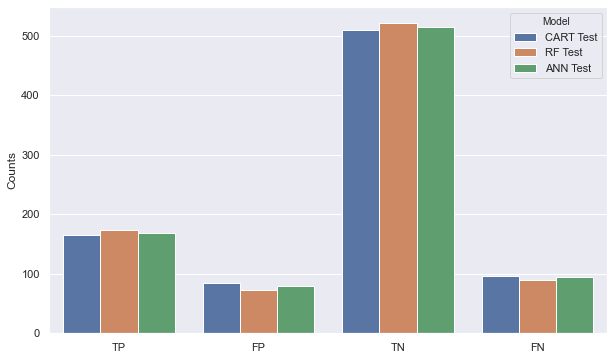

In [141]:
# Test
index = ['TP', 'FP', 'TN', 'FN']
test_predictions = [cart_test_TP, cart_test_FP, cart_test_TN, cart_test_FN,
                    rf_test_TP, rf_test_FP, rf_test_TN, rf_test_FN,
                    ann_test_TP, ann_test_FP, ann_test_TN, ann_test_FN]
test_predictions_name =index*3
test_predictions_df = pd.DataFrame(test_predictions, columns = ['Counts'], index = test_predictions_name)
test_models_predictions = ['CART Test']*4 + ['RF Test']*4 + ['ANN Test']*4
test_predictions_df['Model'] = test_models_predictions


plt.figure(figsize = (10,6))
sns.barplot( y = test_predictions_df['Counts'], x = test_predictions_df.index, hue = test_predictions_df['Model'])
printmd('**Comparision of Prediction counts of CART, RF and ANN for Testing set :**')

# Conclusion:
- We can compare the three models on the following parameters:
    1. **Difference in performance between Train and Test Data:** We have already observed that all the model performance metrics are well within the general norm of +/- 10% of each other. 
    2. **Difference between minority and majority class:** It has been observed in the classification report of the different models that due to imbalance of the dataset, there is difference in 'Precision', 'Recall' and 'F1 score'. Especially the difference in 'Recall' is more, above 20% in all the models training and testing set both.
    3. **Overfitting:** Since all the metrics are below 90%, there is no case of overfitting.
    4. **Recall of minority class:** Since already we have discussed the importance of Recall parameter in our case, hence it is important to compare the recall of the the different models. The Recall of all the models for training and testing set is above 60%. The overall recall performance is nearly same considering both the train and test set for the three models. Thus we can observe F1 score, which also focuses on precison of the minority class, thus reducing keeping a check on both type I and type II error. The CART and RF seem to perform better as a whole as compared to ANN. Since CART is a simpler model than RF and still gives nearly as good results, **hence we choose the CART Model as best/optimized model.** 

# Business insights and Recommendations:

## Insights based on EDA:
- Bivariate analysis is done with the target variable Claimed and the other independent variables and the following insights observed:
    1. **Duration:** The average duration of people of claimed insurance is much higher than people who didn't claim insurance, it is approximately double.
    2. **Sales:** The average Sales of tour insurance policies to people who claimed insurance is much higher than people who didn't claim insurance, it is approximately more than double.
	3. **Commisions:** The average commission received for tour insurance firms from people who claimed insurance is much higher than people who didn't claim insurance, it is approximately 2.5 times.
    4. **Product Name:** In Bronze and Customized plan the percentage of insurance claims are less. In the Cancellation plan the percentage of insurance claims is least. But in Gold and Silver plan the percentage of insurance claims is much higher.
    5. **Type:** For 'Travel Agency' type tour firms the insurance claims are much less. But for 'Airlines' type tour firms percentage of people who claim insurance and who don't claim are nearly equal.
    6. **Agency_Code:** For the tour agencies with Agency code 'CWT', 'EPX' and 'JZI', the percentage of people who claimed insurance is lesser than people who didn't. But for 'C2B' the percentage of people claimed insurance is much higher than who didn't.

## Recommendations based on EDA:
1. Thus customers with higher values of Duration, Sales and Commisions tend to claim insurance more often. 
	- Longer duration plans may contain trip cancellation or trip interruption benefits, which may lead to more insurance claims, so such clauses, should be more carefully designed by the insurance firm.
	- Higher Sales and Commisions may include greater insurance benefits which is why higher claims. So the benefits provided must be properly designed.
2.	Thus the issues with customers using Gold and Silver Plans should be studied, to decrease the insurance claims. The clauses in these plans may be such that encourages greater insurance claims.
3.	The Airlines type tour firms seem to have higher insurance claim rates and these type of tour firms must be compared with Travel Agency type firms, such that it could be understood why Travel Agency type tour firms have lesser insurance claims compared to Airlines type firms.
4.	Further the Agency with agency code ‘C2B’ has much more customers who claim insurance. While the other agencies have lesser percentage of customers making insurance claims. This could be a service issue of the agency and hence should be dealt by the insurance firm.

## Insights and Recommendations from Models:
- The variable importance parameter in CART and RF show that ‘Agency_Code’ is the most important variable. Thus if this variable has higher importance in making classifications of insurance claims, then it must have some dependency on the claim status and vice versa, understanding this relationship may help to reduce the insurance claims for the insurance firms. 